<a href="https://colab.research.google.com/github/abhijit2512/EDUTALK-WEBAPP/blob/main/Clean1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Read the border crossing data
border = pd.read_csv("Border_Crossing_Entry_Data (1).csv",
                     on_bad_lines='skip',
                     low_memory=False)

# Read the GHG emission factors data
ghg = pd.read_csv("SupplyChainGHGEmissionFactors_v1.3.0_NAICS_CO2e_USD2022 (1).csv",
                  on_bad_lines='skip',
                  low_memory=False)

# Quick check
print("Border shape:", border.shape)
print("GHG shape:", ghg.shape)

print("\nBorder columns:", list(border.columns))
print("GHG columns:", list(ghg.columns))


Border shape: (402318, 10)
GHG shape: (1016, 8)

Border columns: ['Port Name', 'State', 'Port Code', 'Border', 'Date', 'Measure', 'Value', 'Latitude', 'Longitude', 'Point']
GHG columns: ['2017 NAICS Code', '2017 NAICS Title', 'GHG', 'Unit', 'Supply Chain Emission Factors without Margins', 'Margins of Supply Chain Emission Factors', 'Supply Chain Emission Factors with Margins', 'Reference USEEIO Code']


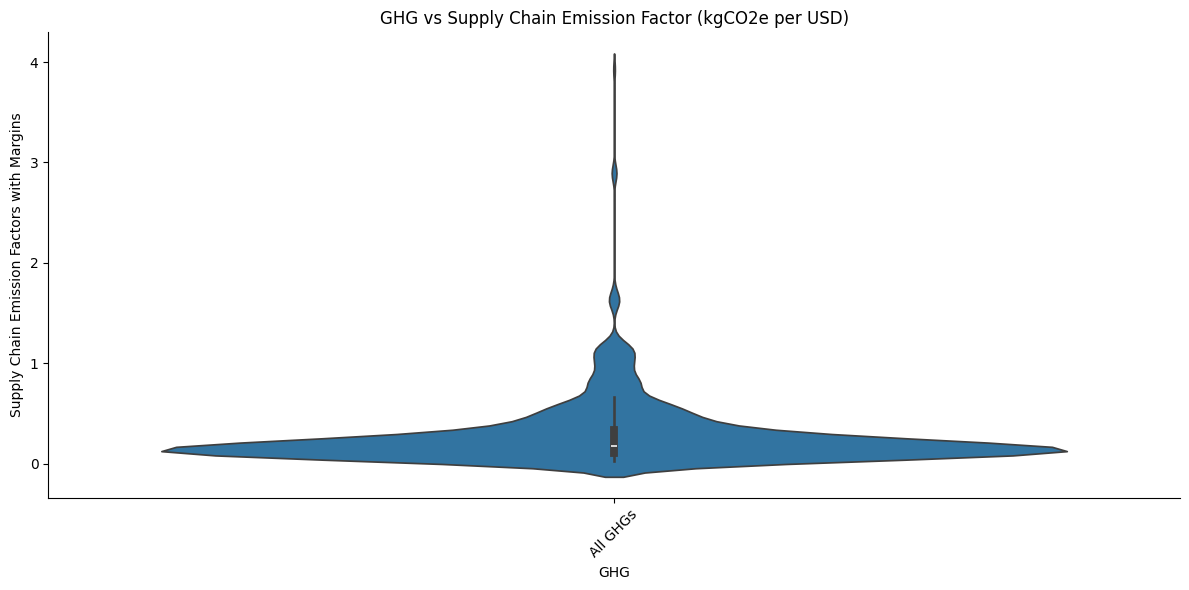

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Choose which EF column to plot
EF_COL = "Supply Chain Emission Factors with Margins"   # or: "Supply Chain Emission Factors without Margins"

# Keep only the columns we need
plot_df = ghg[['GHG', EF_COL]].copy()

# Make sure the EF column is numeric
plot_df[EF_COL] = pd.to_numeric(plot_df[EF_COL], errors='coerce')

# Drop missing values
plot_df = plot_df.dropna(subset=[EF_COL, 'GHG'])

# Violin plot: distribution of EF per GHG across all NAICS rows
plt.figure(figsize=(12, 6))
sns.violinplot(
    data=plot_df,
    x='GHG',                # categorical
    y=EF_COL,               # numeric emission factor
    inner='box'
)
sns.despine(top=True, right=True)
plt.title("GHG vs Supply Chain Emission Factor (kgCO2e per USD)")
plt.xlabel("GHG")
plt.ylabel(EF_COL)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
# Zip all PNG files in the current directory
!zip -r all_images.zip *.png


	zip warning: name not matched: *.png

zip error: Nothing to do! (try: zip -r all_images.zip . -i *.png)


In [ ]:
# @title Intensity vs Margins of Supply Chain Emission Factors

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(ghg['Intensity'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(ghg, x='Margins of Supply Chain Emission Factors', y='Intensity', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

/tmp/ipython-input-791234138.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


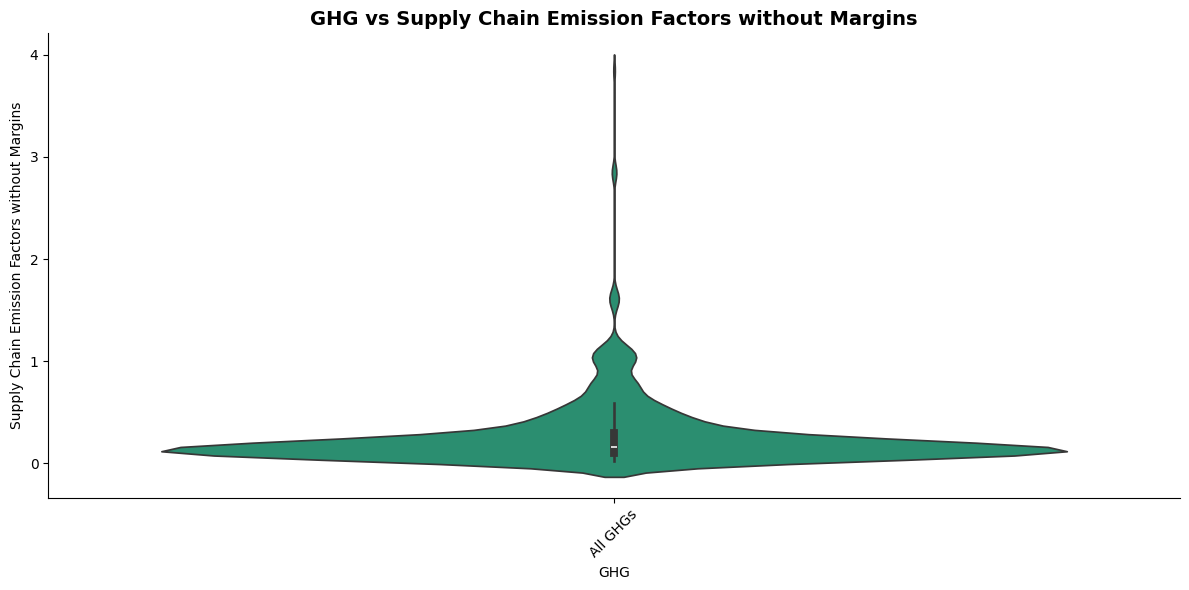

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

sns.violinplot(
    data=ghg,
    x='GHG',   # categorical variable (like CO2, CH4, N2O)
    y='Supply Chain Emission Factors without Margins',  # numeric values
    inner='box',
    palette='Dark2'
)

sns.despine(top=True, right=True)
plt.title("GHG vs Supply Chain Emission Factors without Margins", fontsize=14, fontweight='bold')
plt.xlabel("GHG")
plt.ylabel("Supply Chain Emission Factors without Margins")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/tmp/ipython-input-3978809211.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
/tmp/ipython-input-3978809211.py:19: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


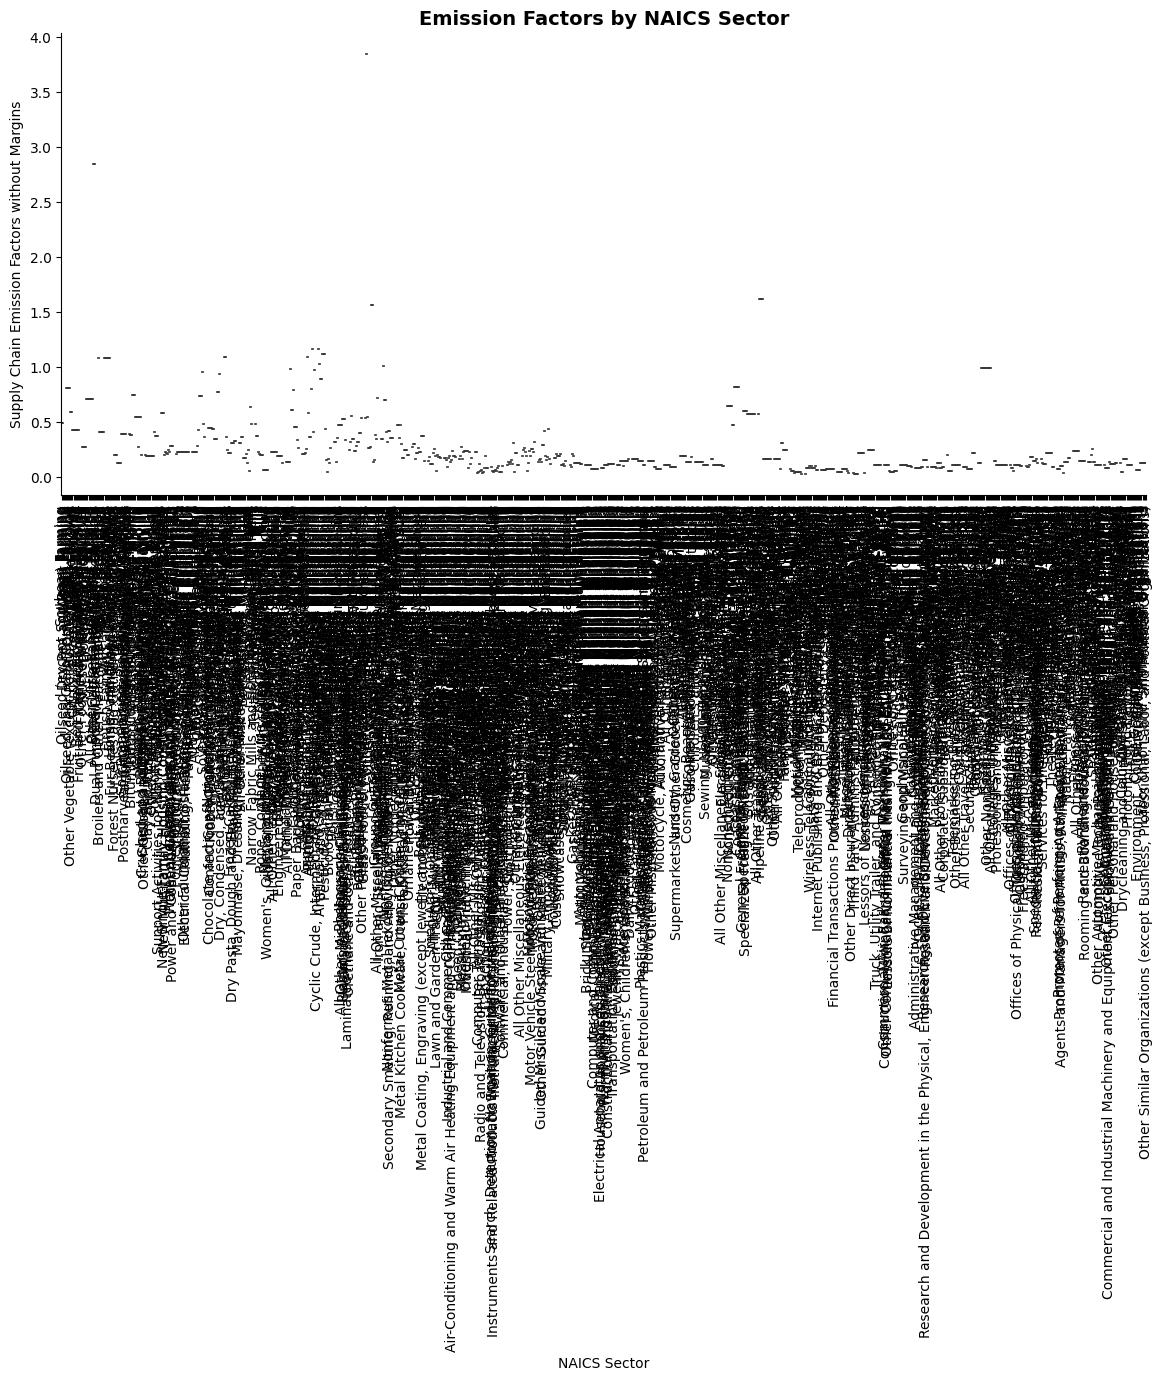

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 6))

sns.violinplot(
    data=ghg,
    x='2017 NAICS Title',   # industry/sector categories
    y='Supply Chain Emission Factors without Margins',  # numeric EF values
    inner='box',
    palette='Dark2'
)

sns.despine(top=True, right=True)
plt.title("Emission Factors by NAICS Sector", fontsize=14, fontweight='bold')
plt.xlabel("NAICS Sector")
plt.ylabel("Supply Chain Emission Factors without Margins")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


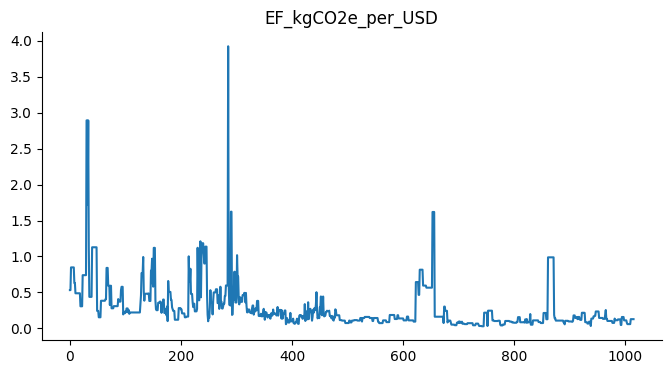

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Pick which EF column you want to use
EF_COL = "Supply Chain Emission Factors with Margins"        # or: "Supply Chain Emission Factors without Margins"

# Create an alias so code that expects 'EF_kgCO2e_per_USD' won't crash
ghg = ghg.copy()
ghg["EF_kgCO2e_per_USD"] = pd.to_numeric(ghg[EF_COL], errors="coerce")

# Simple plot (over row index)
ax = ghg["EF_kgCO2e_per_USD"].plot(kind="line", figsize=(8,4), title="EF_kgCO2e_per_USD")
ax.spines[['top','right']].set_visible(False)
plt.show()


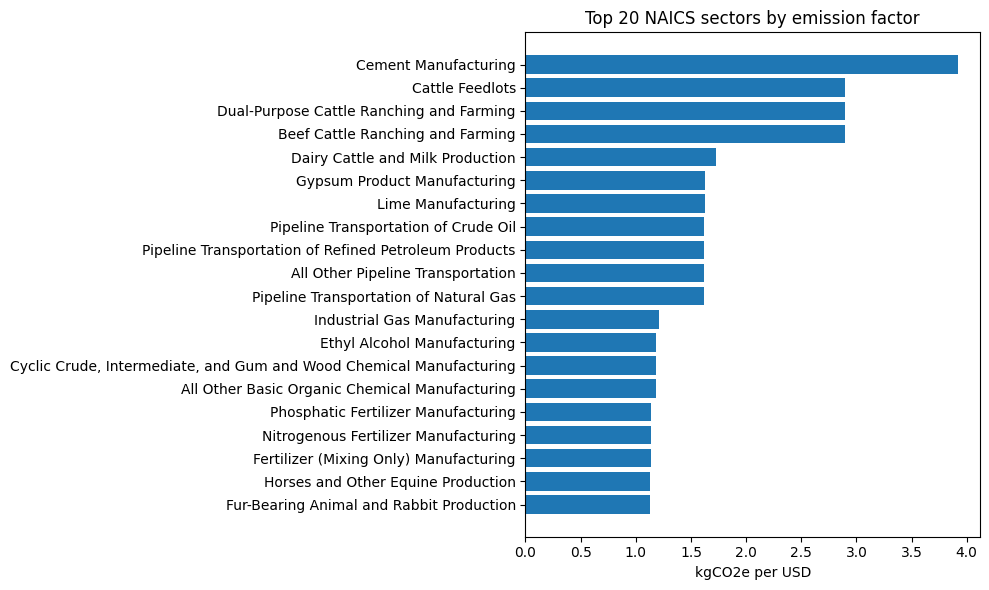

In [ ]:
# Average EF by sector and plot top 20
top = (ghg.groupby("2017 NAICS Title", as_index=False)["EF_kgCO2e_per_USD"]
         .mean()
         .sort_values("EF_kgCO2e_per_USD", ascending=False)
         .head(20))

plt.figure(figsize=(10,6))
plt.barh(top["2017 NAICS Title"], top["EF_kgCO2e_per_USD"])
plt.gca().invert_yaxis()
plt.xlabel("kgCO2e per USD")
plt.title("Top 20 NAICS sectors by emission factor")
plt.tight_layout()
plt.show()


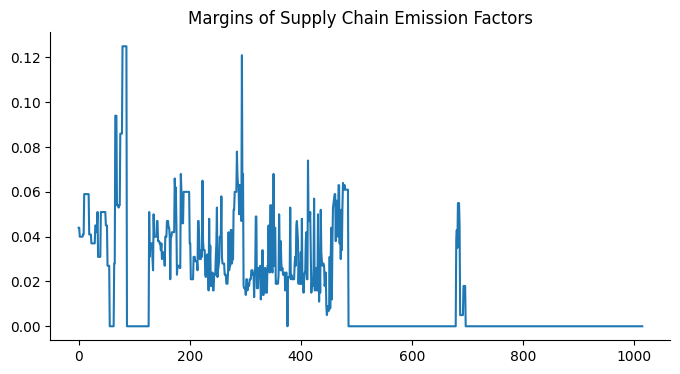

In [ ]:
# @title Margins of Supply Chain Emission Factors

from matplotlib import pyplot as plt
ghg['Margins of Supply Chain Emission Factors'].plot(kind='line', figsize=(8, 4), title='Margins of Supply Chain Emission Factors')
plt.gca().spines[['top', 'right']].set_visible(False)

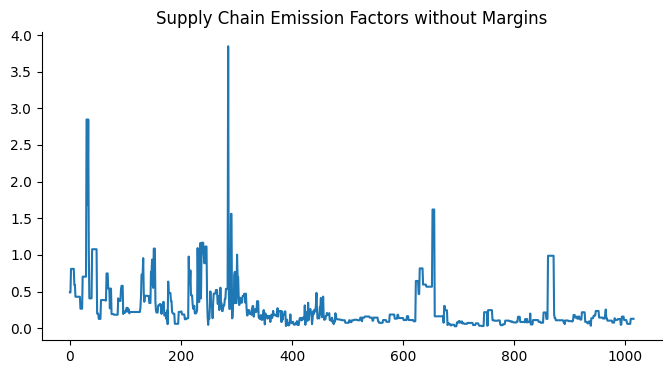

In [ ]:
# @title Supply Chain Emission Factors without Margins

from matplotlib import pyplot as plt
ghg['Supply Chain Emission Factors without Margins'].plot(kind='line', figsize=(8, 4), title='Supply Chain Emission Factors without Margins')
plt.gca().spines[['top', 'right']].set_visible(False)

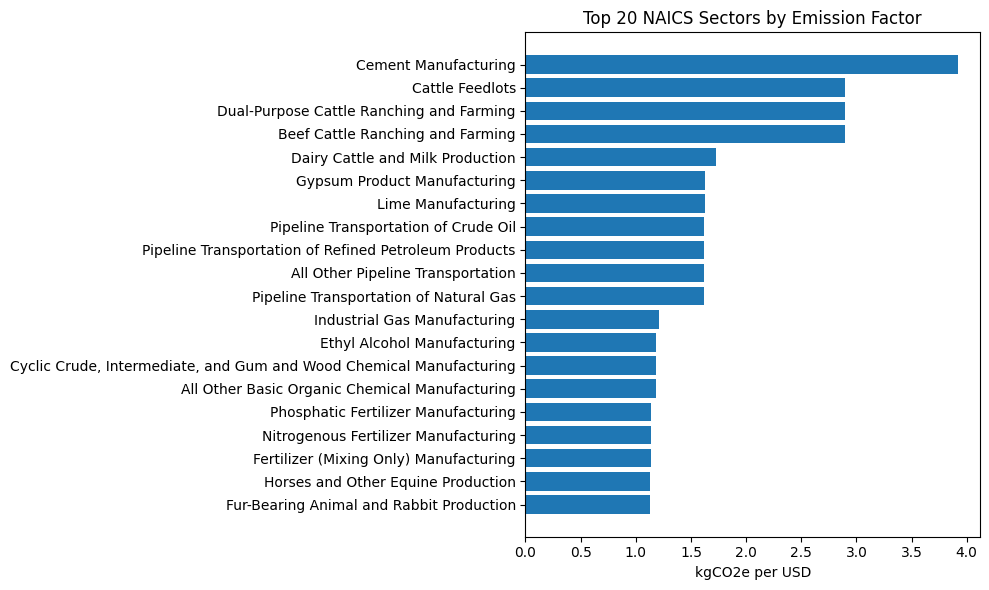

In [ ]:
import matplotlib.pyplot as plt

# Example: just plot the numeric EF column by index, grouped by NAICS Title
EF_COL = "Supply Chain Emission Factors with Margins"

# create alias so it's shorter
ghg = ghg.copy()
ghg["NAICS_Title"] = ghg["2017 NAICS Title"]

# group and plot average EF by NAICS Title (top 20 to avoid overcrowding)
top = (ghg.groupby("NAICS_Title", as_index=False)[EF_COL]
         .mean()
         .sort_values(EF_COL, ascending=False)
         .head(20))

plt.figure(figsize=(10,6))
plt.barh(top["NAICS_Title"], top[EF_COL])
plt.gca().invert_yaxis()
plt.xlabel("kgCO2e per USD")
plt.title("Top 20 NAICS Sectors by Emission Factor")
plt.tight_layout()
plt.show()


/tmp/ipython-input-1197917556.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=counts, x='count', y='NAICS_Title', palette='Dark2')


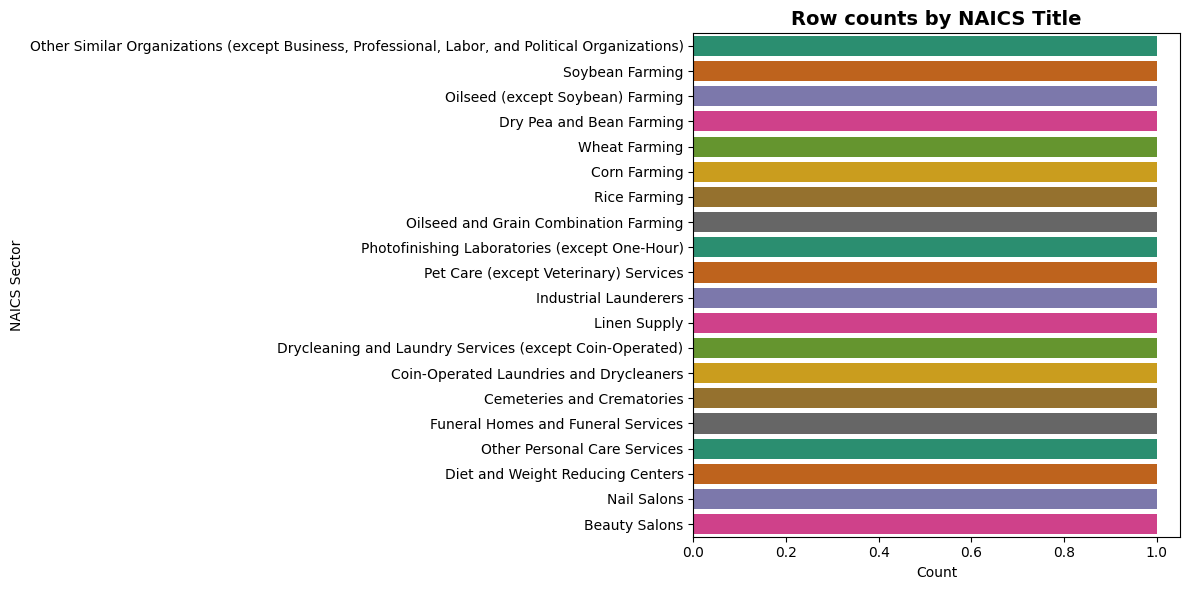

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count rows by NAICS Title → clean column names in one step
counts = (
    ghg['2017 NAICS Title']
      .value_counts()
      .rename_axis('NAICS_Title')      # name for the category column
      .reset_index(name='count')       # name for the counts column
)

# (Optional) keep top 20 to avoid clutter
counts = counts.head(20)

plt.figure(figsize=(12, 6))
sns.barplot(data=counts, x='count', y='NAICS_Title', palette='Dark2')

plt.title("Row counts by NAICS Title", fontsize=14, fontweight='bold')
plt.xlabel("Count")
plt.ylabel("NAICS Sector")
plt.tight_layout()
plt.show()


/tmp/ipython-input-1984828720.py:32: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


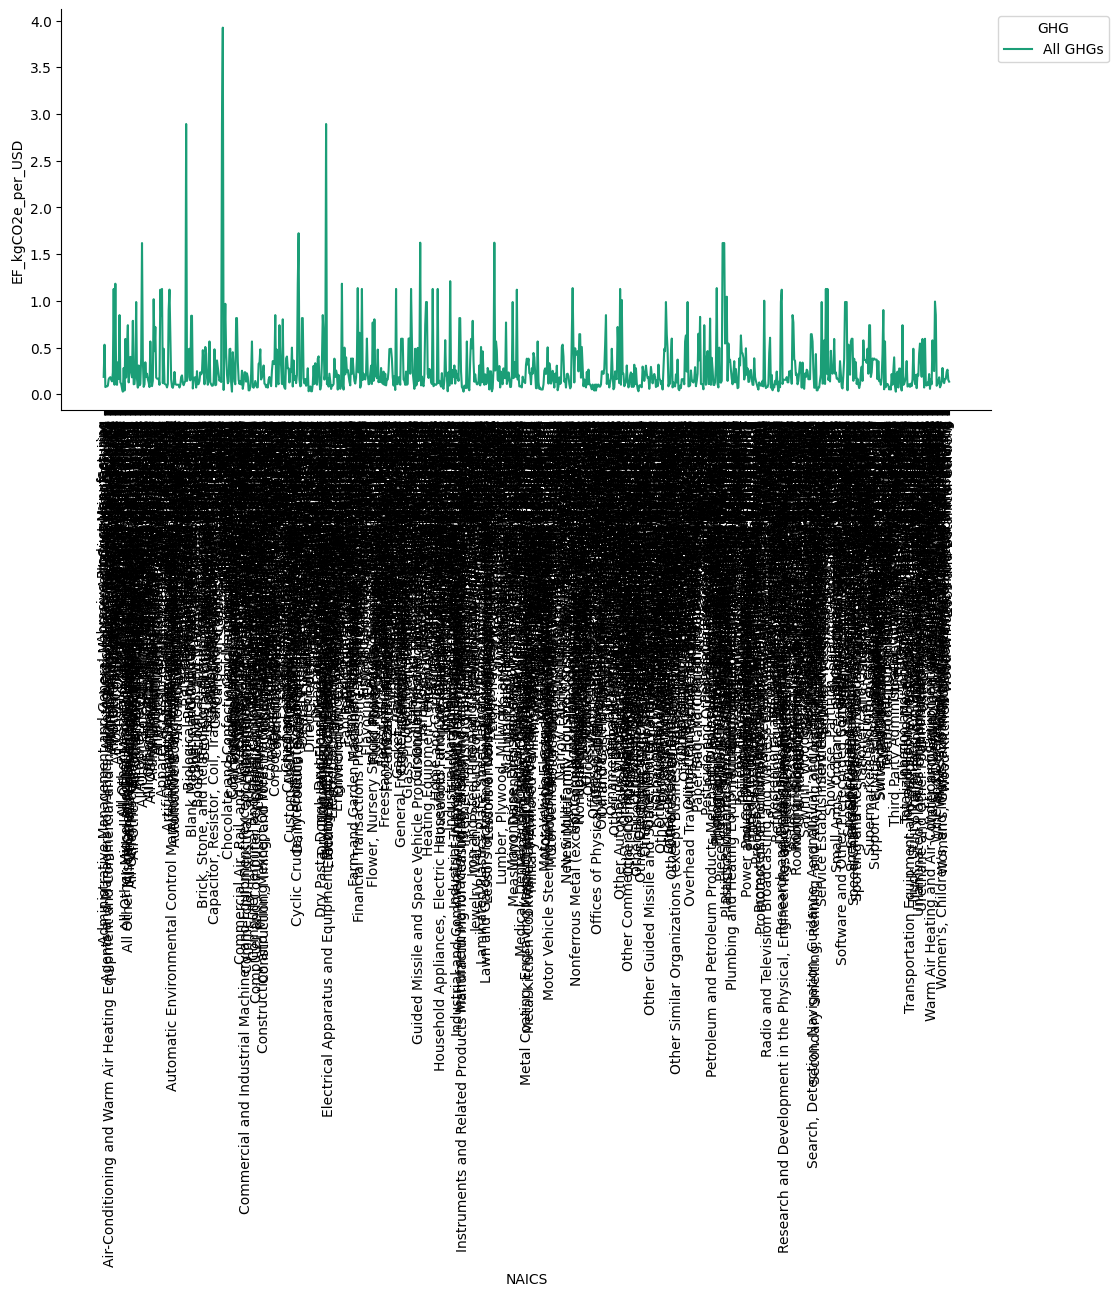

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

EF_COL = "Supply Chain Emission Factors with Margins"   # or "Supply Chain Emission Factors without Margins"

ghg = ghg.copy()
ghg = ghg.rename(columns={"2017 NAICS Title": "NAICS"})   # alias so your code can use 'NAICS'
ghg["EF_kgCO2e_per_USD"] = pd.to_numeric(ghg[EF_COL], errors="coerce")  # alias numeric EF col

# Keep only needed cols and drop missing
plot_df = ghg[["NAICS", "GHG", "EF_kgCO2e_per_USD"]].dropna()

# ---- Plot: NAICS vs EF_kgCO2e_per_USD, one line per GHG (replacing 'Intensity') ----
def _plot_series(df, series_name, series_index=0):
    palette = list(sns.color_palette("Dark2"))
    xs = df["NAICS"]
    ys = df["EF_kgCO2e_per_USD"]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

plt.figure(figsize=(12, 5.2))
df_sorted = plot_df.sort_values("NAICS", ascending=True)

for i, (series_name, series) in enumerate(df_sorted.groupby("GHG")):  # <-- 'GHG' not 'Intensity'
    _plot_series(series, series_name, i)

sns.despine(top=True, right=True)
plt.legend(title="GHG", bbox_to_anchor=(1, 1), loc="upper left")
plt.xlabel("NAICS")
plt.ylabel("EF_kgCO2e_per_USD")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


/tmp/ipython-input-3105731827.py:29: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


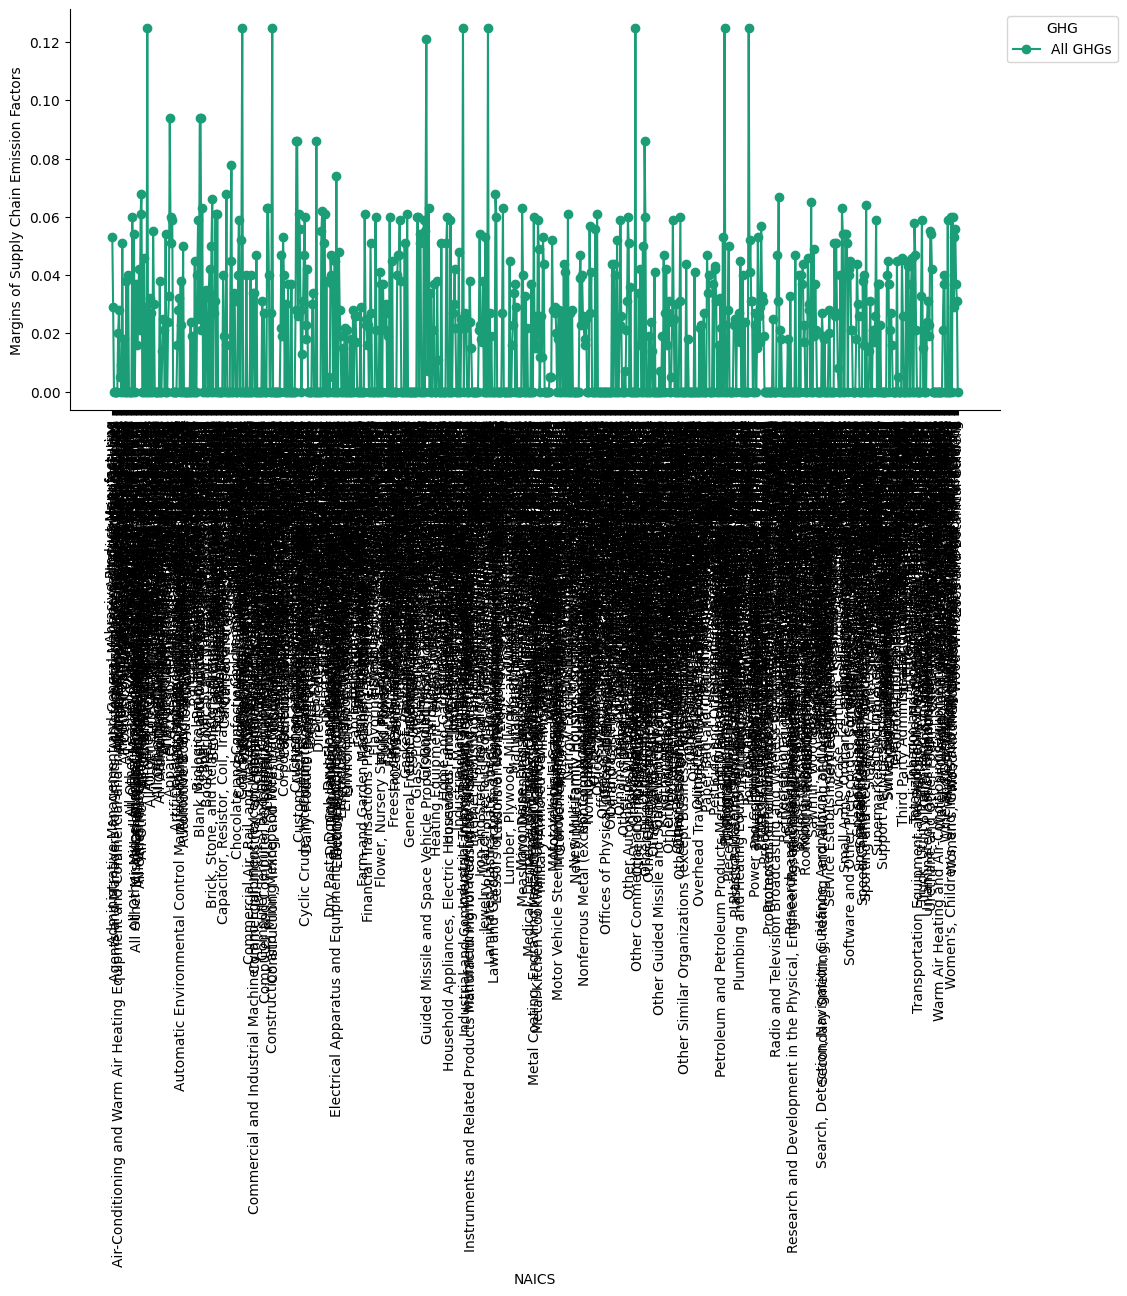

In [ ]:
# ✅ NAICS vs Margins of Supply Chain Emission Factors (by GHG)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

MARGIN_COL = "Margins of Supply Chain Emission Factors"

# Make safe aliases and ensure numeric
df = ghg.rename(columns={"2017 NAICS Title": "NAICS"}).copy()
df[MARGIN_COL] = pd.to_numeric(df[MARGIN_COL], errors="coerce")
df = df.dropna(subset=["NAICS", "GHG", MARGIN_COL])

plt.figure(figsize=(12, 5.2))
df_sorted = df.sort_values("NAICS")

# one line per GHG (replacing the nonexistent 'Intensity')
palette = list(sns.color_palette("Dark2"))
for i, (gas, sub) in enumerate(df_sorted.groupby("GHG")):
    plt.plot(sub["NAICS"], sub[MARGIN_COL],
             marker="o", linestyle="-",
             label=gas, color=palette[i % len(palette)])

sns.despine(top=True, right=True)
plt.legend(title="GHG", bbox_to_anchor=(1, 1), loc="upper left")
plt.xlabel("NAICS")
plt.ylabel(MARGIN_COL)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()



/tmp/ipython-input-1745160249.py:28: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


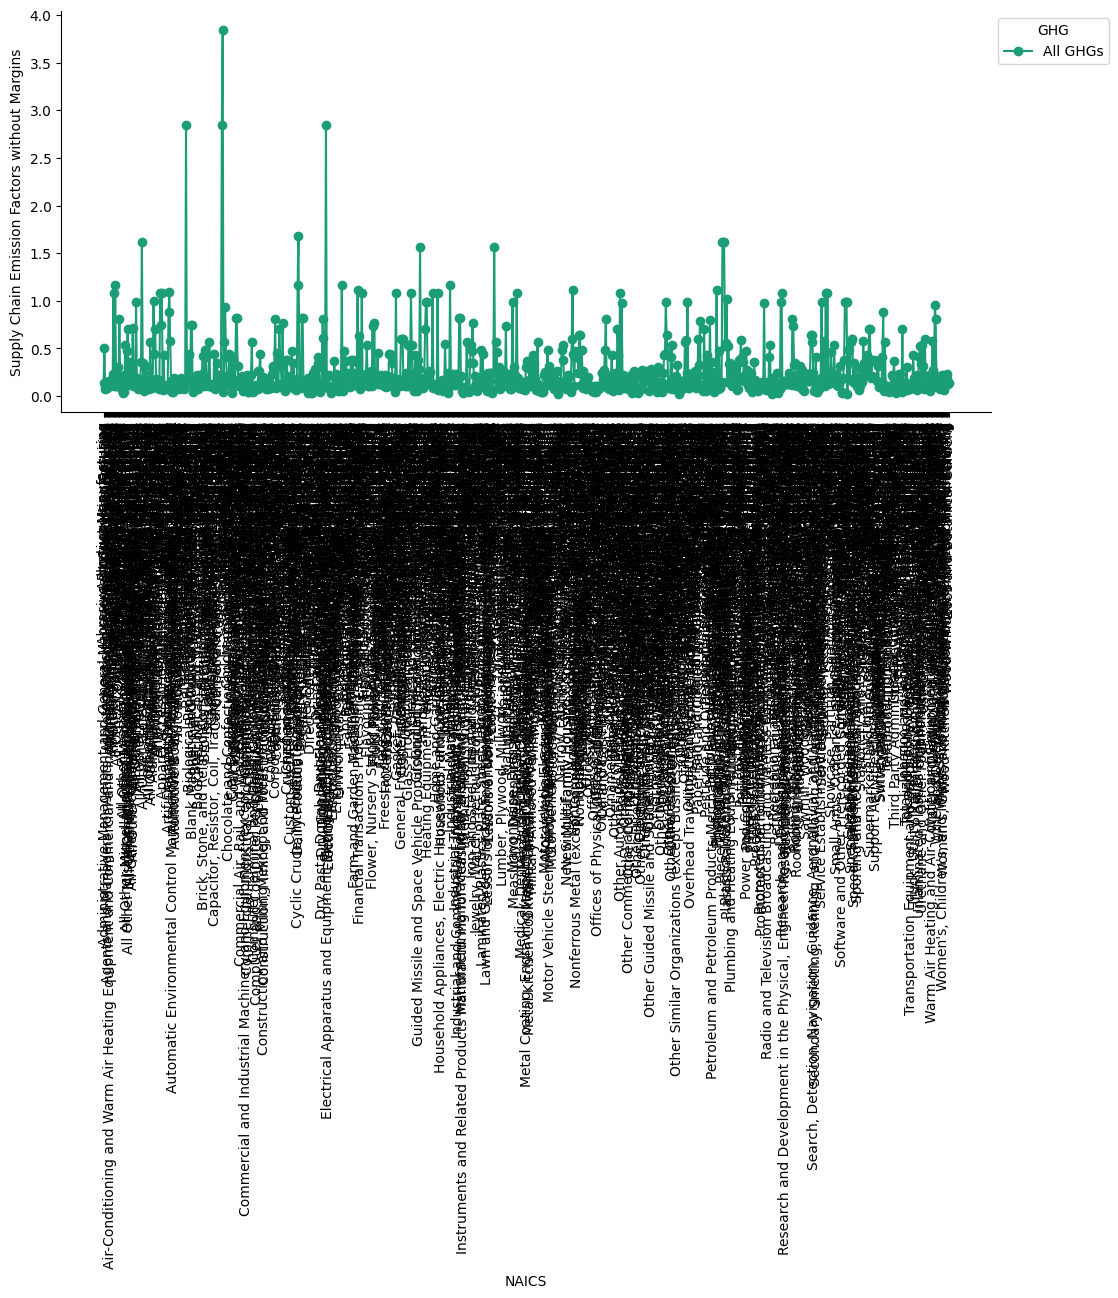

In [ ]:
# ✅ NAICS vs Supply Chain Emission Factors without Margins (grouped by GHG)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

VAL_COL = "Supply Chain Emission Factors without Margins"

# Make aliases and ensure numeric
df = ghg.rename(columns={"2017 NAICS Title": "NAICS"}).copy()
df[VAL_COL] = pd.to_numeric(df[VAL_COL], errors="coerce")
df = df.dropna(subset=["NAICS", "GHG", VAL_COL])

plt.figure(figsize=(12, 5.2))
df_sorted = df.sort_values("NAICS")

palette = list(sns.color_palette("Dark2"))
for i, (gas, sub) in enumerate(df_sorted.groupby("GHG")):   # <-- was 'Intensity'
    plt.plot(sub["NAICS"], sub[VAL_COL],
             marker="o", linestyle="-",
             label=gas, color=palette[i % len(palette)])

sns.despine(top=True, right=True)
plt.legend(title="GHG", bbox_to_anchor=(1, 1), loc="upper left")
plt.xlabel("NAICS")
plt.ylabel(VAL_COL)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


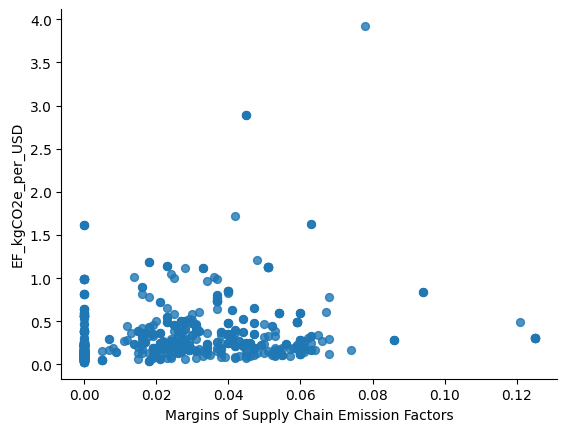

In [ ]:
# @title Margins of Supply Chain Emission Factors vs EF_kgCO2e_per_USD

from matplotlib import pyplot as plt
ghg.plot(kind='scatter', x='Margins of Supply Chain Emission Factors', y='EF_kgCO2e_per_USD', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

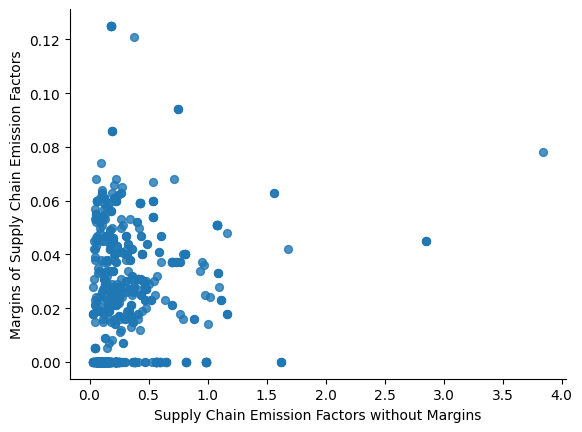

In [ ]:
# @title Supply Chain Emission Factors without Margins vs Margins of Supply Chain Emission Factors

from matplotlib import pyplot as plt
ghg.plot(kind='scatter', x='Supply Chain Emission Factors without Margins', y='Margins of Supply Chain Emission Factors', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

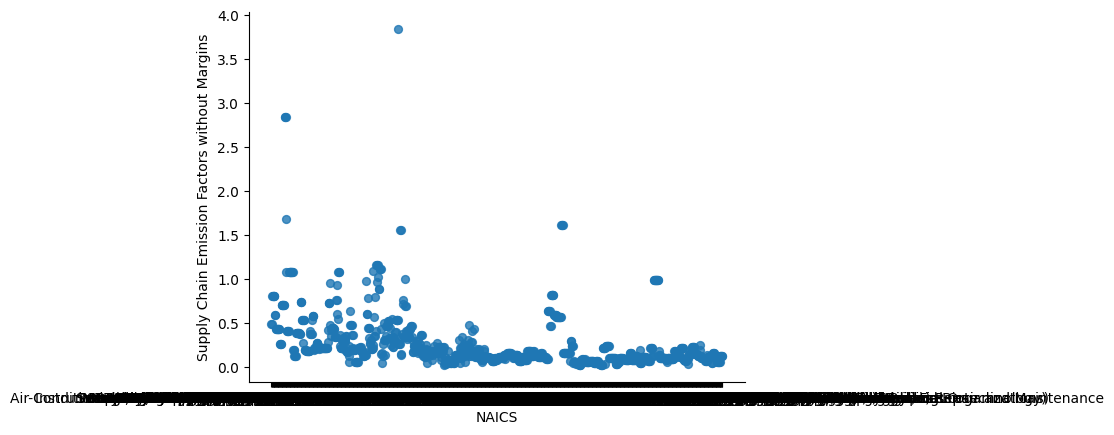

In [ ]:
# @title NAICS vs Supply Chain Emission Factors without Margins

from matplotlib import pyplot as plt
ghg.plot(kind='scatter', x='NAICS', y='Supply Chain Emission Factors without Margins', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

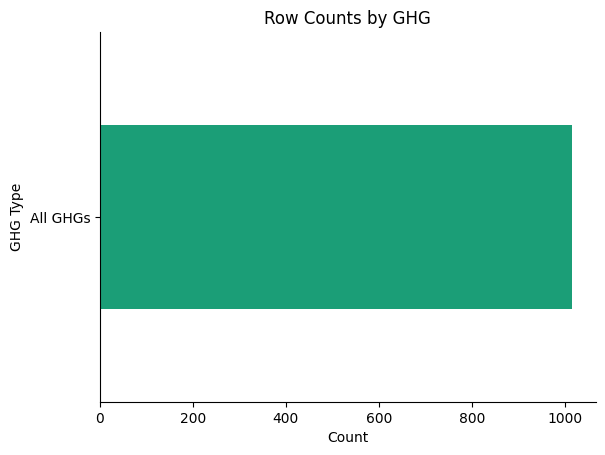

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

ghg.groupby('GHG').size().plot(
    kind='barh',
    color=sns.color_palette('Dark2')
)

plt.title("Row Counts by GHG")
plt.xlabel("Count")
plt.ylabel("GHG Type")
plt.gca().spines[['top','right']].set_visible(False)
plt.show()


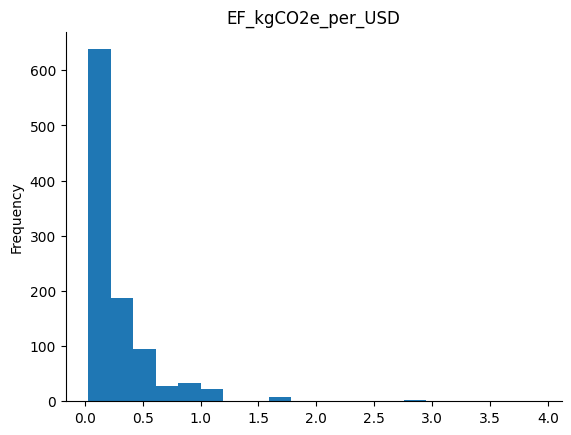

In [ ]:
# @title EF_kgCO2e_per_USD

from matplotlib import pyplot as plt
ghg['EF_kgCO2e_per_USD'].plot(kind='hist', bins=20, title='EF_kgCO2e_per_USD')
plt.gca().spines[['top', 'right',]].set_visible(False)

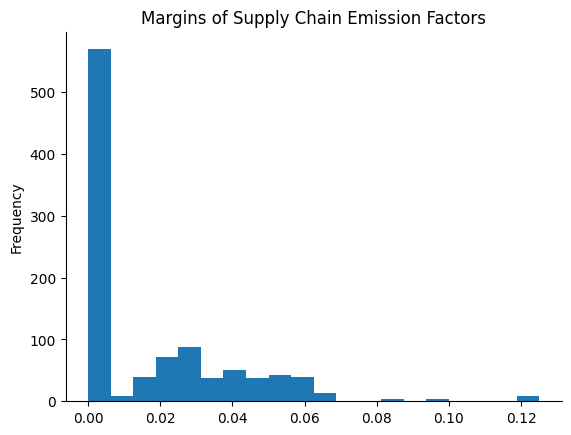

In [ ]:
# @title Margins of Supply Chain Emission Factors

from matplotlib import pyplot as plt
ghg['Margins of Supply Chain Emission Factors'].plot(kind='hist', bins=20, title='Margins of Supply Chain Emission Factors')
plt.gca().spines[['top', 'right',]].set_visible(False)

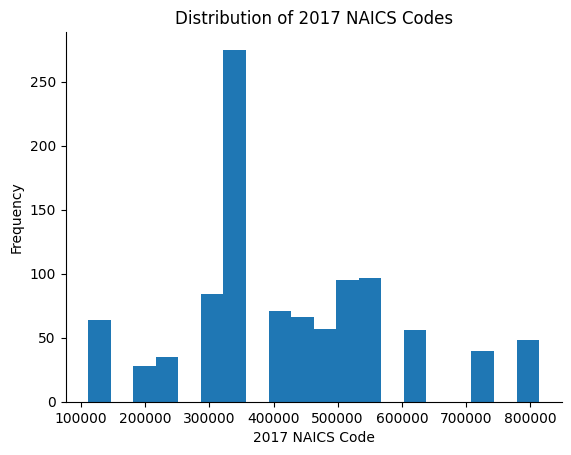

In [ ]:
from matplotlib import pyplot as plt

# Histogram of NAICS Codes
ghg['2017 NAICS Code'].plot(
    kind='hist',
    bins=20,
    title='Distribution of 2017 NAICS Codes'
)

plt.gca().spines[['top','right']].set_visible(False)
plt.xlabel("2017 NAICS Code")
plt.ylabel("Frequency")
plt.show()


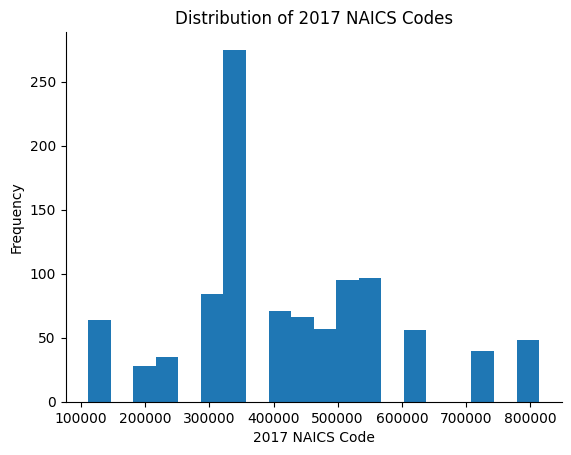

In [ ]:
from matplotlib import pyplot as plt

ghg['2017 NAICS Code'].plot(
    kind='hist',
    bins=20,
    title='Distribution of 2017 NAICS Codes'
)

plt.gca().spines[['top','right']].set_visible(False)
plt.xlabel("2017 NAICS Code")
plt.ylabel("Frequency")
plt.show()



In [ ]:
# Border dataset: keep only US-Canada border and Trucks
border = border[border['Border'] == 'US-Canada Border']
border = border[border['Measure'].str.contains('Truck', case=False, na=False)]
border['Date'] = pd.to_datetime(border['Date'])
border['Year'] = border['Date'].dt.year
border['Month'] = border['Date'].dt.to_period('M')

# GHG dataset: keep All GHGs and correct unit
ghg = ghg[ghg['GHG'] == 'All GHGs']
ghg = ghg[ghg['Unit'] == 'kg CO2e/2022 USD, purchaser price']
ghg = ghg.rename(columns={
    '2017 NAICS Code': 'NAICS',
    '2017 NAICS Title': 'NAICS_Title',
    'Supply Chain Emission Factors with Margins': 'EF_kgCO2e_per_USD'
})

print(border.shape, ghg.shape)


(85047, 12) (1016, 10)


/tmp/ipython-input-3664340862.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  border['Date'] = pd.to_datetime(border['Date'])


In [ ]:
# Zip all PNG files in the current directory
!zip -r all_images.zip *.png


	zip warning: name not matched: *.png

zip error: Nothing to do! (try: zip -r all_images.zip . -i *.png)


Port Name
Detroit                   255329.629944
Buffalo Niagara Falls     161766.014124
Port Huron                135344.706215
Blaine                     63011.483051
Champlain Rouses Point     53855.666667
Pembina                    35545.864407
Alexandria Bay             34588.991525
Sumas                      23110.237288
Sweetgrass                 22548.514124
Derby Line                 17387.279661
Name: Value, dtype: float64


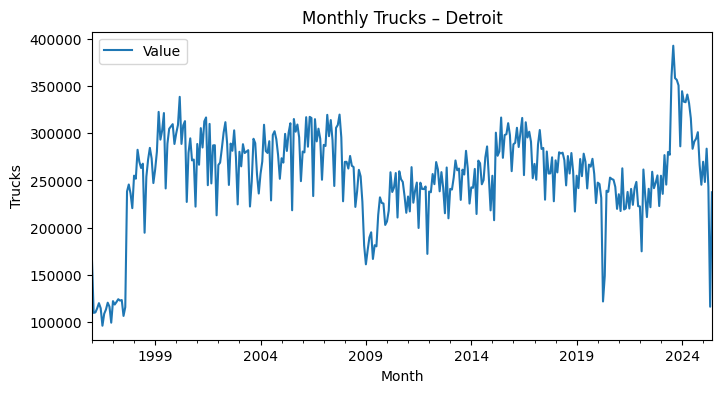

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Group monthly totals
monthly = border.groupby(['Port Name','Month'], as_index=False)['Value'].sum()

# Convert 'Value' to numeric, coercing errors
monthly['Value'] = pd.to_numeric(monthly['Value'], errors='coerce')

# Drop rows with NaN in 'Value' after coercion
monthly.dropna(subset=['Value'], inplace=True)


# Top 10 ports by average monthly trucks
port_rank = monthly.groupby('Port Name')['Value'].mean().sort_values(ascending=False).head(10)
print(port_rank)

# Plot busiest port trend
busiest = port_rank.index[0]
trend = monthly[monthly['Port Name'] == busiest].sort_values('Month')
trend.plot(x='Month', y='Value', kind='line', figsize=(8,4))
plt.title(f'Monthly Trucks – {busiest}')
plt.xlabel('Month')
plt.ylabel('Trucks')
plt.show()

In [ ]:
# Convert Value to numeric, force errors to NaN
border['Value'] = pd.to_numeric(border['Value'], errors='coerce')

# Drop rows with missing Value
border = border.dropna(subset=['Value'])

# Ensure Value is realistic (e.g., filter out crazy large numbers > 1 million trucks/month)
border = border[border['Value'] <= 1_000_000]

print(border['Value'].describe())


count     85047.000000
mean       4102.087681
std       14670.380365
min           0.000000
25%          30.000000
50%         298.000000
75%        1503.000000
max      219478.000000
Name: Value, dtype: float64


Port Name
Detroit                   255329.629944
Buffalo Niagara Falls     161766.014124
Port Huron                135344.706215
Blaine                     63011.483051
Champlain Rouses Point     53855.666667
Pembina                    35545.864407
Alexandria Bay             34588.991525
Sumas                      23110.237288
Sweetgrass                 22548.514124
Derby Line                 17387.279661
Name: Value, dtype: float64


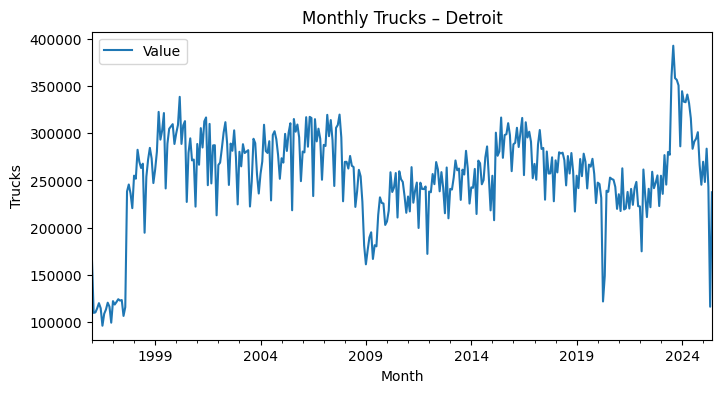

In [ ]:
# Group monthly totals
monthly = border.groupby(['Port Name','Month'], as_index=False)['Value'].sum()

# Top 10 ports
port_rank = monthly.groupby('Port Name')['Value'].mean().sort_values(ascending=False).head(10)
print(port_rank)

# Plot busiest port trend
import matplotlib.pyplot as plt
busiest = port_rank.index[0]
trend = monthly[monthly['Port Name'] == busiest].sort_values('Month')
trend.plot(x='Month', y='Value', kind='line', figsize=(8,4))
plt.title(f'Monthly Trucks – {busiest}')
plt.xlabel('Month')
plt.ylabel('Trucks')
plt.show()


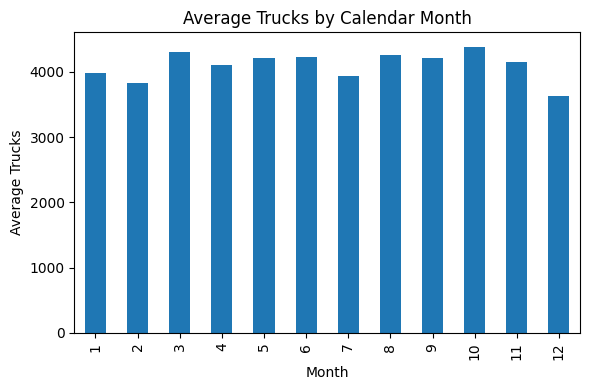

In [ ]:
import matplotlib.pyplot as plt

seasonal = border.copy()
seasonal['CalMonth'] = seasonal['Date'].dt.month
seasonality = seasonal.groupby('CalMonth')['Value'].mean()

ax = seasonality.plot(kind='bar', figsize=(6,4))
plt.title('Average Trucks by Calendar Month')
plt.xlabel('Month'); plt.ylabel('Average Trucks')
plt.tight_layout()
plt.savefig('seasonality_trucks.png', dpi=150, bbox_inches='tight')
plt.show()


In [ ]:
# monthly totals were created earlier as 'monthly'
port_rank = monthly.groupby('Port Name')['Value'].mean().sort_values(ascending=False).head(10)
port_df = port_rank.reset_index()
port_df.columns = ['Port', 'AvgMonthlyTrucks']

# 0–100 score where 100 = most congested (highest avg)
mn, mx = port_df['AvgMonthlyTrucks'].min(), port_df['AvgMonthlyTrucks'].max()
port_df['CongestionScore'] = ((port_df['AvgMonthlyTrucks'] - mn) / (mx - mn) * 100).round(1)

display(port_df)
port_df.to_csv('top_ports_congestion.csv', index=False)


Port  AvgMonthlyTrucks  CongestionScore
0                 Detroit     255329.629944            100.0
1   Buffalo Niagara Falls     161766.014124             60.7
2              Port Huron     135344.706215             49.6
3                  Blaine      63011.483051             19.2
4  Champlain Rouses Point      53855.666667             15.3
5                 Pembina      35545.864407              7.6
6          Alexandria Bay      34588.991525              7.2
7                   Sumas      23110.237288              2.4
8              Sweetgrass      22548.514124              2.2
9              Derby Line      17387.279661              0.0

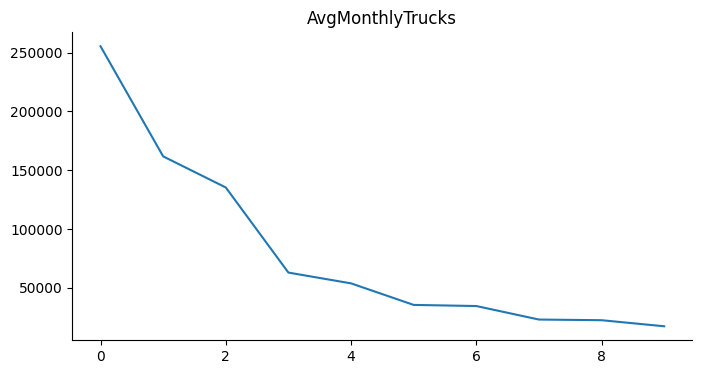

In [ ]:
# @title AvgMonthlyTrucks

from matplotlib import pyplot as plt
port_df['AvgMonthlyTrucks'].plot(kind='line', figsize=(8, 4), title='AvgMonthlyTrucks')
plt.gca().spines[['top', 'right']].set_visible(False)

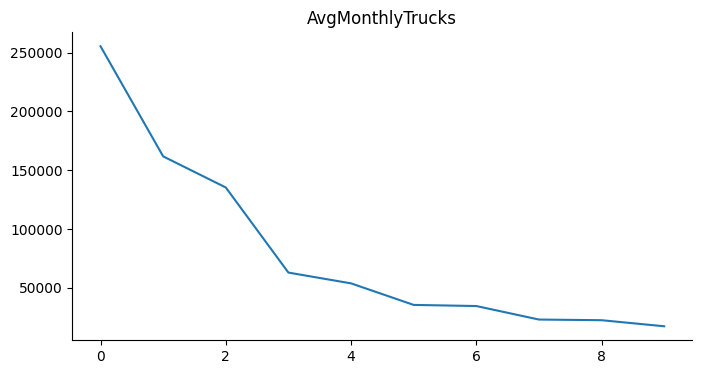

In [ ]:
# @title AvgMonthlyTrucks

from matplotlib import pyplot as plt
port_df['AvgMonthlyTrucks'].plot(kind='line', figsize=(8, 4), title='AvgMonthlyTrucks')
plt.gca().spines[['top', 'right']].set_visible(False)

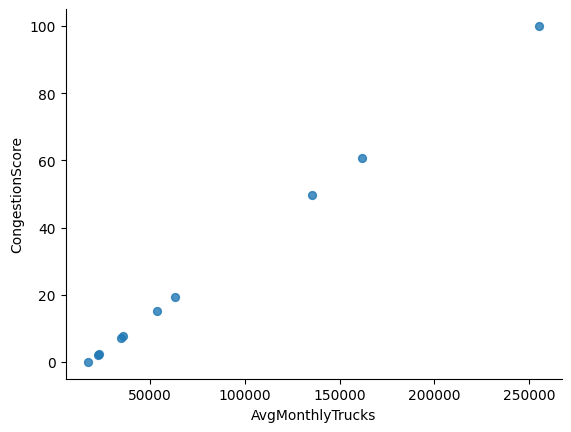

In [ ]:
# @title AvgMonthlyTrucks vs CongestionScore

from matplotlib import pyplot as plt
port_df.plot(kind='scatter', x='AvgMonthlyTrucks', y='CongestionScore', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

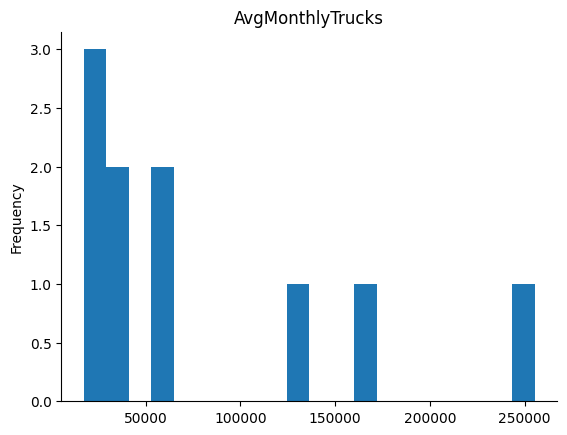

In [ ]:
# @title AvgMonthlyTrucks

from matplotlib import pyplot as plt
port_df['AvgMonthlyTrucks'].plot(kind='hist', bins=20, title='AvgMonthlyTrucks')
plt.gca().spines[['top', 'right',]].set_visible(False)

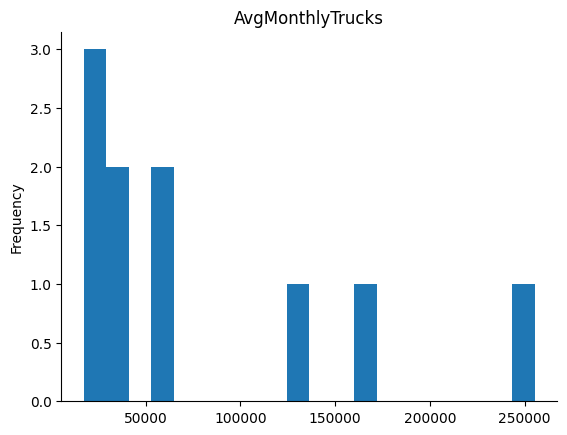

In [ ]:
# @title AvgMonthlyTrucks

from matplotlib import pyplot as plt
port_df['AvgMonthlyTrucks'].plot(kind='hist', bins=20, title='AvgMonthlyTrucks')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# Authenticate this Colab session with your Google account
from google.colab import auth
auth.authenticate_user()

# Use gspread + gspread_dataframe to push to Sheets
!pip -q install gspread gspread_dataframe

import gspread
from google.auth import default
from gspread_dataframe import set_with_dataframe

creds, _ = default()           # get user creds from Colab
gc = gspread.authorize(creds)

# (a) create a new sheet
sh = gc.create("port_df export")
ws = sh.sheet1

# OR (b) open an existing sheet by URL or name
# sh = gc.open_by_url("https://docs.google.com/spreadsheets/d/XXXXXXXXXXXXX/edit")
# ws = sh.worksheet("Sheet1")

# Write the DataFrame
set_with_dataframe(ws, port_df, include_index=False, resize=True)

print("Done. Sheet URL:", sh.url)


Done. Sheet URL: https://docs.google.com/spreadsheets/d/1ccooAjSogkpbb0UnSWXsNROK6x1J4KarsFlJtsXgv8w


In [ ]:
import pandas as pd

# -------- 1) Canonicalize GHG columns & build aliases once --------
def prep_ghg(df):
    g = df.copy()
    g.columns = g.columns.str.strip().str.replace(r"\s+", " ", regex=True)
    g = g.loc[:, ~g.columns.duplicated(keep="first")]  # remove duplicate-named cols

    # Find EF column (with or without margins)
    ef_col = next((c for c in g.columns
                   if c.lower().startswith("supply chain emission factors with margins")), None)
    if ef_col is None:
        ef_col = next((c for c in g.columns
                       if c.lower().startswith("supply chain emission factors without margins")), None)
    if ef_col is None:
        raise KeyError(f"Could not find EF column. Available: {list(g.columns)}")

    # Create canonical names used later
    g["EF_kgCO2e_per_USD"] = pd.to_numeric(g[ef_col], errors="coerce")

    for cand in ["NAICS_Title", "2017 NAICS Title", "NAICS Title"]:
        if cand in g.columns:
            g = g.rename(columns={cand: "NAICS_Title"})
            break

    for cand in ["NAICS_Code", "2017 NAICS Code", "NAICS Code"]:
        if cand in g.columns:
            g = g.rename(columns={cand: "NAICS_Code"})
            break

    return g

ghg_std = prep_ghg(ghg)

# -------- 2) Top 10 high-intensity industries (by EF) --------
cols_to_keep = ["EF_kgCO2e_per_USD"]
if "NAICS_Title" in ghg_std.columns: cols_to_keep.append("NAICS_Title")
if "NAICS_Code"  in ghg_std.columns: cols_to_keep.append("NAICS_Code")
if "GHG"         in ghg_std.columns: cols_to_keep.append("GHG")

high10 = (ghg_std.dropna(subset=["EF_kgCO2e_per_USD"])
                  .sort_values("EF_kgCO2e_per_USD", ascending=False)
                  .head(10)[cols_to_keep]
                  .copy())

# -------- 3) Normalise EF to 0–100 for scoring --------
emin = ghg_std["EF_kgCO2e_per_USD"].min()
emax = ghg_std["EF_kgCO2e_per_USD"].max()
high10["EmissionScore"] = ((high10["EF_kgCO2e_per_USD"] - emin) / (emax - emin) * 100).round(1)

# -------- 4) Pick top 5 congested ports and cross-join --------
ports5 = port_df.nlargest(5, "CongestionScore").copy()

priority = (ports5.assign(key=1)
            .merge(high10.assign(key=1), on="key")
            .drop(columns="key"))

# 0.6 * congestion + 0.4 * emission
priority["PriorityScore"] = (0.6*priority["CongestionScore"] + 0.4*priority["EmissionScore"]).round(1)
priority = priority.sort_values("PriorityScore", ascending=False)

display(priority.head(15))
priority.to_csv("priority_matrix_ports_naics.csv", index=False)


Port  AvgMonthlyTrucks  CongestionScore  \
0                 Detroit     255329.629944            100.0   
1                 Detroit     255329.629944            100.0   
2                 Detroit     255329.629944            100.0   
3                 Detroit     255329.629944            100.0   
4                 Detroit     255329.629944            100.0   
5                 Detroit     255329.629944            100.0   
6                 Detroit     255329.629944            100.0   
7                 Detroit     255329.629944            100.0   
8                 Detroit     255329.629944            100.0   
10  Buffalo Niagara Falls     161766.014124             60.7   
9                 Detroit     255329.629944            100.0   
20             Port Huron     135344.706215             49.6   
12  Buffalo Niagara Falls     161766.014124             60.7   
11  Buffalo Niagara Falls     161766.014124             60.7   
13  Buffalo Niagara Falls     161766.014124             60.7   

    EF_kgCO2e_per_USD       GHG  EmissionScore  PriorityScore  
0               3.846  All GHGs          100.0          100.0  
1               2.847  All GHGs           73.8           89.5  
2               2.847  All GHGs           73.8           89.5  
3               2.847  All GHGs           73.8           89.5  
4               1.682  All GHGs           43.4           77.4  
5               1.619  All GHGs           41.7           76.7  
6               1.619  All GHGs           41.7           76.7  
7               1.619  All GHGs           41.7           76.7  
8               1.619  All GHGs           41.7           76.7  
10              3.846  All GHGs          100.0           76.4  
9               1.560  All GHGs           40.2           76.1  
20              3.846  All GHGs          100.0           69.8  
12              2.847  All GHGs           73.8           65.9  
11              2.847  All GHGs           73.8           65.9  
13              2.847  All GHGs           73.8           65.9

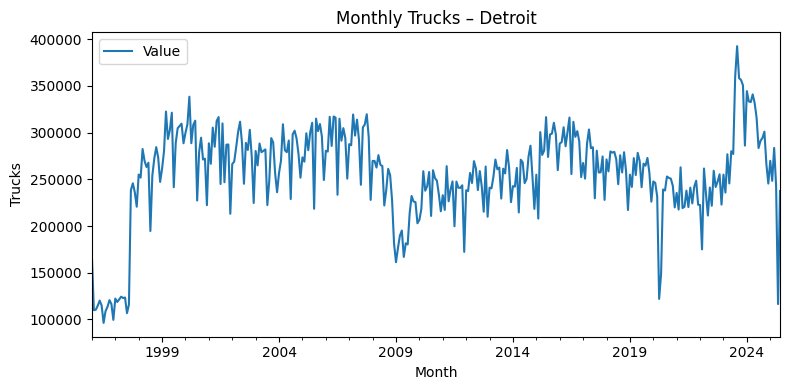

In [ ]:
busiest = port_df.sort_values('CongestionScore', ascending=False).iloc[0]['Port']
trend = monthly[monthly['Port Name'] == busiest].sort_values('Month')
ax = trend.plot(x='Month', y='Value', kind='line', figsize=(8,4))
plt.title(f'Monthly Trucks – {busiest}')
plt.xlabel('Month'); plt.ylabel('Trucks'); plt.tight_layout()
plt.savefig('trend_busiest_port.png', dpi=150, bbox_inches='tight')
plt.show()


In [ ]:
seasonal = border.copy()
seasonal['CalMonth'] = seasonal['Date'].dt.month
seasonality_tbl = seasonal.groupby('CalMonth')['Value'].agg(['mean','median','max','count']).round(1)
display(seasonality_tbl)
seasonality_tbl.to_csv('seasonality_summary.csv')


mean  median     max  count
CalMonth                               
1         3981.5   287.0  183835   7205
2         3829.5   286.5  178835   7222
3         4298.6   299.0  178215   7216
4         4111.6   264.0  180631   7202
5         4220.2   301.0  175044   7158
6         4224.7   293.5  168207   7230
7         3931.9   299.0  193823   6999
8         4252.6   320.0  219478   6986
9         4208.0   314.0  191178   6972
10        4388.0   333.0  191147   6965
11        4146.5   304.5  187700   6940
12        3630.3   274.0  153974   6952

In [ ]:
# Use monthly totals from before
port_rank = monthly.groupby('Port Name')['Value'].mean().sort_values(ascending=False).head(10)
port_df = port_rank.reset_index()
port_df.columns = ['Port', 'AvgMonthlyTrucks']

# Calculate congestion score 0–100
mn, mx = port_df['AvgMonthlyTrucks'].min(), port_df['AvgMonthlyTrucks'].max()
port_df['CongestionScore'] = ((port_df['AvgMonthlyTrucks'] - mn) / (mx - mn) * 100).round(1)

display(port_df)
port_df.to_csv('top_ports_congestion.csv', index=False)



Port  AvgMonthlyTrucks  CongestionScore
0                 Detroit     255329.629944            100.0
1   Buffalo Niagara Falls     161766.014124             60.7
2              Port Huron     135344.706215             49.6
3                  Blaine      63011.483051             19.2
4  Champlain Rouses Point      53855.666667             15.3
5                 Pembina      35545.864407              7.6
6          Alexandria Bay      34588.991525              7.2
7                   Sumas      23110.237288              2.4
8              Sweetgrass      22548.514124              2.2
9              Derby Line      17387.279661              0.0

In [ ]:
import pandas as pd

# ---------- 1) Standardize GHG columns & build aliases ----------
def prep_ghg(df):
    g = df.copy()
    # clean col names + drop duplicate-named columns
    g.columns = g.columns.str.strip().str.replace(r"\s+", " ", regex=True)
    g = g.loc[:, ~g.columns.duplicated(keep="first")]

    # detect EF column (prefer "with margins", else "without")
    ef_col = next((c for c in g.columns if c.lower().startswith("supply chain emission factors with margins")), None)
    if ef_col is None:
        ef_col = next((c for c in g.columns if c.lower().startswith("supply chain emission factors without margins")), None)
    if ef_col is None:
        raise KeyError(f"Could not find EF column. Available: {list(g.columns)}")

    # create canonical EF column
    g["EF_kgCO2e_per_USD"] = pd.to_numeric(g[ef_col], errors="coerce")

    # alias NAICS title/code if present
    title_src = next((c for c in ["NAICS_Title","2017 NAICS Title","NAICS Title"] if c in g.columns), None)
    code_src  = next((c for c in ["NAICS_Code","2017 NAICS Code","NAICS Code"]  if c in g.columns), None)
    if title_src: g = g.rename(columns={title_src: "NAICS_Title"})
    if code_src:  g = g.rename(columns={code_src:  "NAICS_Code"})

    return g

ghg_std = prep_ghg(ghg)

# ---------- 2) Select top 10 high-emission industries ----------
cols = ["EF_kgCO2e_per_USD"]
if "NAICS_Title" in ghg_std.columns: cols.append("NAICS_Title")
if "NAICS_Code"  in ghg_std.columns: cols.append("NAICS_Code")
if "GHG"         in ghg_std.columns: cols.append("GHG")

high10 = (ghg_std.dropna(subset=["EF_kgCO2e_per_USD"])
                  .sort_values("EF_kgCO2e_per_USD", ascending=False)
                  .head(10)[cols]
                  .copy())

# ---------- 3) Normalise EF to 0–100 ----------
emin = ghg_std["EF_kgCO2e_per_USD"].min()
emax = ghg_std["EF_kgCO2e_per_USD"].max()
high10["EmissionScore"] = ((high10["EF_kgCO2e_per_USD"] - emin) / (emax - emin) * 100).round(1)

# ---------- 4) Top 5 congested ports ----------
ports5 = port_df.nlargest(5, "CongestionScore").copy()

# ---------- 5) Cross-join & compute priority score ----------
priority = (ports5.assign(key=1)
            .merge(high10.assign(key=1), on="key")
            .drop(columns="key"))

priority["PriorityScore"] = (0.6*priority["CongestionScore"] + 0.4*priority["EmissionScore"]).round(1)
priority = priority.sort_values("PriorityScore", ascending=False)

display(priority.head(15))
priority.to_csv("priority_matrix_ports_naics.csv", index=False)


Port  AvgMonthlyTrucks  CongestionScore  \
0                 Detroit     255329.629944            100.0   
1                 Detroit     255329.629944            100.0   
2                 Detroit     255329.629944            100.0   
3                 Detroit     255329.629944            100.0   
4                 Detroit     255329.629944            100.0   
5                 Detroit     255329.629944            100.0   
6                 Detroit     255329.629944            100.0   
7                 Detroit     255329.629944            100.0   
8                 Detroit     255329.629944            100.0   
10  Buffalo Niagara Falls     161766.014124             60.7   
9                 Detroit     255329.629944            100.0   
20             Port Huron     135344.706215             49.6   
12  Buffalo Niagara Falls     161766.014124             60.7   
11  Buffalo Niagara Falls     161766.014124             60.7   
13  Buffalo Niagara Falls     161766.014124             60.7   

    EF_kgCO2e_per_USD       GHG  EmissionScore  PriorityScore  
0               3.846  All GHGs          100.0          100.0  
1               2.847  All GHGs           73.8           89.5  
2               2.847  All GHGs           73.8           89.5  
3               2.847  All GHGs           73.8           89.5  
4               1.682  All GHGs           43.4           77.4  
5               1.619  All GHGs           41.7           76.7  
6               1.619  All GHGs           41.7           76.7  
7               1.619  All GHGs           41.7           76.7  
8               1.619  All GHGs           41.7           76.7  
10              3.846  All GHGs          100.0           76.4  
9               1.560  All GHGs           40.2           76.1  
20              3.846  All GHGs          100.0           69.8  
12              2.847  All GHGs           73.8           65.9  
11              2.847  All GHGs           73.8           65.9  
13              2.847  All GHGs           73.8           65.9

In [ ]:
!zip charts.zip *.png
from google.colab import files
files.download('charts.zip')

  adding: seasonality_trucks.png (deflated 20%)
  adding: trend_busiest_port.png (deflated 5%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import matplotlib.pyplot as plt
import glob
import shutil
import os
import zipfile

# 1. Make a folder to store images
os.makedirs("all_images", exist_ok=True)

# 2. Save each plot in your code using plt.savefig() right after plt.show()
# Example:
# plt.savefig("all_images/plot1.png", dpi=150, bbox_inches="tight")

# 3. If you already saved them in the Colab working directory:
for file in glob.glob("*.png"):  # finds all PNG files in the root folder
    shutil.move(file, "all_images/")

# 4. Zip the folder
with zipfile.ZipFile("all_images.zip", "w") as zipf:
    for file in glob.glob("all_images/*"):
        zipf.write(file)

# 5. Download the zip
from google.colab import files
files.download("all_images.zip")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# If already filtered earlier, you can skip this block.
# BORDER: keep US–Canada + Trucks only
border = border[border['Border'] == 'US-Canada Border']
border = border[border['Measure'].str.contains('Truck', case=False, na=False)]
border['Date'] = pd.to_datetime(border['Date'], errors='coerce')
border = border.dropna(subset=['Date'])

# Value clean
border['Value'] = pd.to_numeric(border['Value'], errors='coerce')
border = border.dropna(subset=['Value'])
border = border[border['Value'] <= 1_000_000]  # cap extreme outliers

border['Month'] = border['Date'].dt.to_period('M')

# GHG: keep All GHGs with the right unit + rename
ghg = ghg[ghg['GHG'] == 'All GHGs']
ghg = ghg[ghg['Unit'] == 'kg CO2e/2022 USD, purchaser price'].copy()
ghg = ghg.rename(columns={
    '2017 NAICS Code': 'NAICS',
    '2017 NAICS Title': 'NAICS_Title',
    'Supply Chain Emission Factors with Margins': 'EF_kgCO2e_per_USD',
    'Margins of Supply Chain Emission Factors': 'EF_Margin',
    'Supply Chain Emission Factors without Margins': 'EF_wo_Margin'
})


In [ ]:
# ==== Overall trend across all ports (US–Canada, Trucks only) ====
import pandas as pd
import matplotlib.pyplot as plt

# 1) Filter & clean (safe to re-run even if you did this earlier)
b = border.copy()
b = b[b['Border'] == 'US-Canada Border']
b = b[b['Measure'].str.contains('Truck', case=False, na=False)]
b['Date'] = pd.to_datetime(b['Date'], errors='coerce')
b['Value'] = pd.to_numeric(b['Value'], errors='coerce')
b = b.dropna(subset=['Date','Value'])
b = b[b['Value'] <= 1_000_000]  # drop extreme outliers

# 2) Aggregate monthly total across ALL ports
b['Month'] = b['Date'].dt.to_period('M')
all_ports_monthly = b.groupby('Month', as_index=False)['Value'].sum()
all_ports_monthly['Month'] = all_ports_monthly['Month'].dt.to_timestamp()

# 3) Plot
ax = all_ports_monthly.plot(x='Month', y='Value', kind='line', figsize=(12,5))
plt.title('Overall Monthly Trucks – All US–Canada Ports')
plt.xlabel('Month'); plt.ylabel('Total Trucks'); plt.tight_layout()

# 4) Save outputs for the report
plt.savefig('Fig_overall_trend_all_ports.png', dpi=150, bbox_inches='tight')
plt.show()

# 5) Also save the aggregated data (optional, handy for appendix)
all_ports_monthly.to_csv('overall_trend_all_ports.csv', index=False)
print('Saved: Fig_overall_trend_all_ports.png and overall_trend_all_ports.csv')


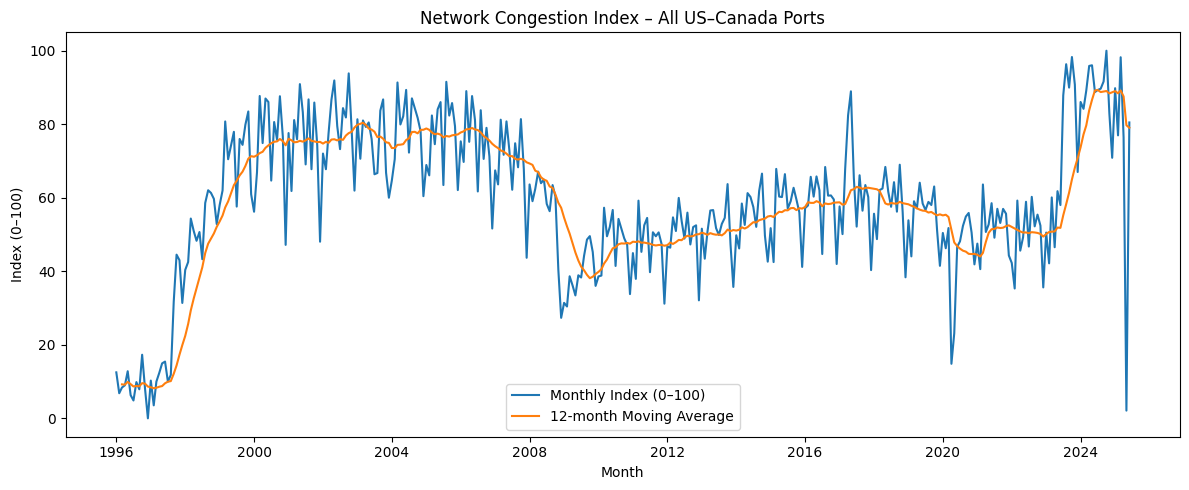

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Start from your already-cleaned 'border' DataFrame
b = border.copy()
b = b[(b['Border']=='US-Canada Border') & (b['Measure'].str.contains('Truck', case=False, na=False))]
b['Date'] = pd.to_datetime(b['Date'], errors='coerce')
b['Value'] = pd.to_numeric(b['Value'], errors='coerce')
b = b.dropna(subset=['Date','Value'])
b = b[b['Value'] <= 1_000_000]

# Monthly total across ALL ports
b['Month'] = b['Date'].dt.to_period('M')
m = b.groupby('Month', as_index=False)['Value'].sum()
m['Month'] = m['Month'].dt.to_timestamp()

# Build a 0–100 congestion index + 12-month MA
mn, mx = m['Value'].min(), m['Value'].max()
m['CongestionIndex'] = 100*(m['Value']-mn)/(mx-mn)
m['CongestionIndex_MA12'] = m['CongestionIndex'].rolling(12, min_periods=3).mean()

# Plot
plt.figure(figsize=(12,5))
plt.plot(m['Month'], m['CongestionIndex'], label='Monthly Index (0–100)')
plt.plot(m['Month'], m['CongestionIndex_MA12'], label='12-month Moving Average')
plt.title('Network Congestion Index – All US–Canada Ports')
plt.xlabel('Month'); plt.ylabel('Index (0–100)'); plt.legend(); plt.tight_layout()
plt.savefig('Fig_congestion_index_overall.png', dpi=150, bbox_inches='tight')
plt.show()

# Optional: save data
m.to_csv('congestion_index_overall.csv', index=False)


Using: NAICS | EF_kgCO2e_per_USD


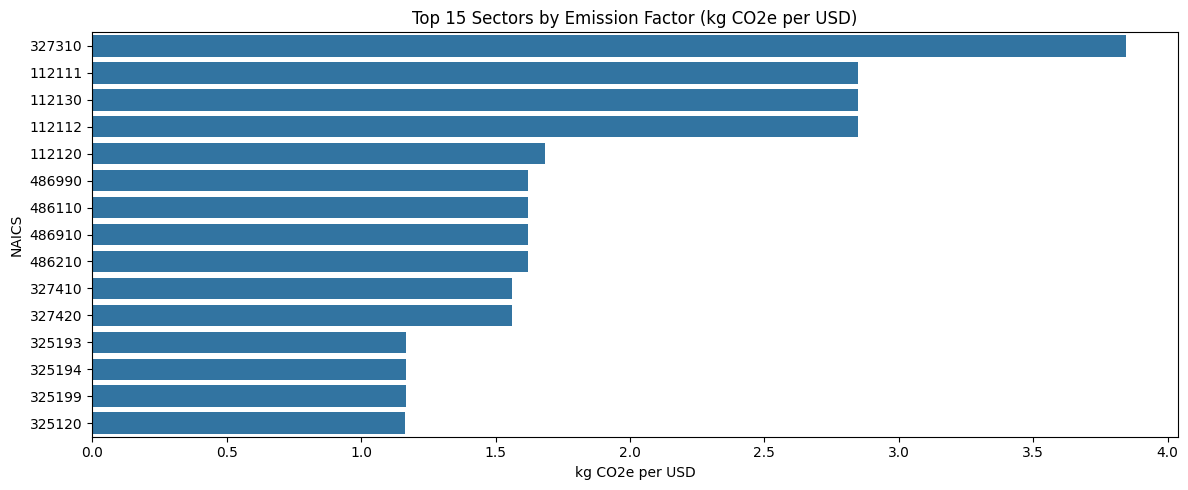

Intensity
Low       340
Medium    340
High      336
Name: count, dtype: int64


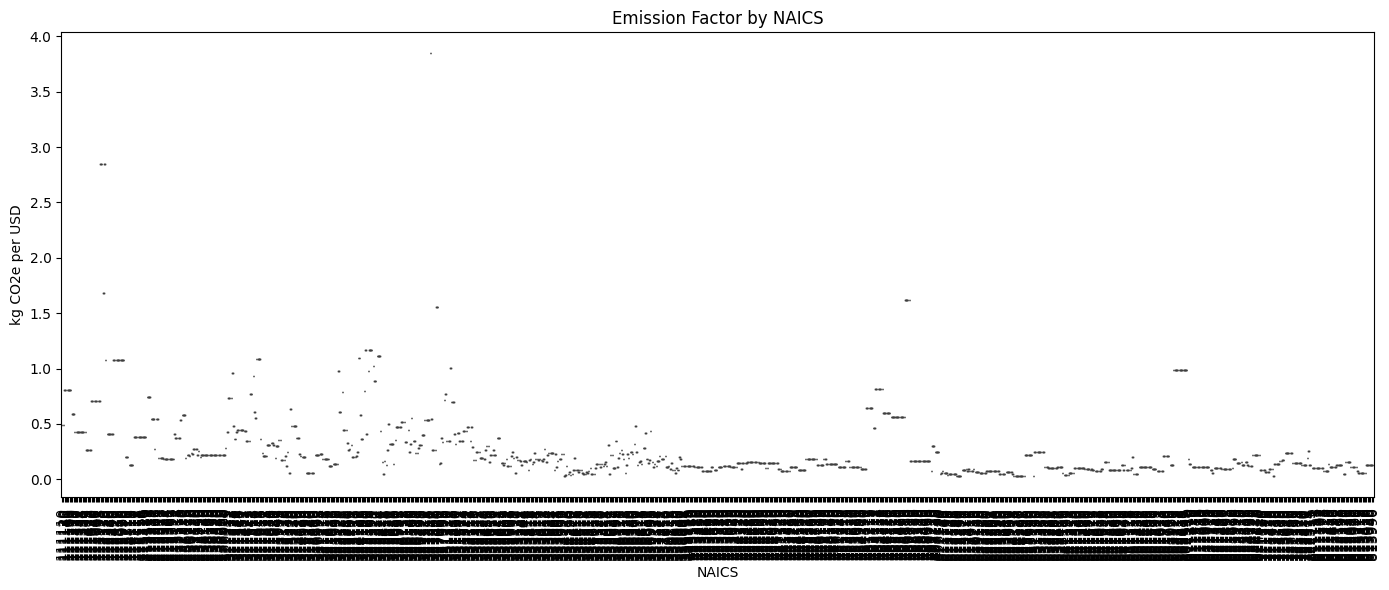

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Work on a clean copy ---
ghg = ghg.copy()
ghg.columns = ghg.columns.str.strip()

# 1) Pick columns that actually exist
EF_COL = "EF_kgCO2e_per_USD" if "EF_kgCO2e_per_USD" in ghg.columns else (
         "EF_Margin" if "EF_Margin" in ghg.columns else "EF_wo_Margin")
NAICS_COL = "NAICS"  # this exists in your dataframe

print("Using:", NAICS_COL, "|", EF_COL)

# 2) Ensure numeric EF + a friendly alias
ghg["EF_val"] = pd.to_numeric(ghg[EF_COL], errors="coerce")
ghg["NAICS_Title"] = ghg[NAICS_COL].astype(str)

# 3) Example A: Top 15 sectors by average EF
agg = (ghg.dropna(subset=["EF_val"])
          .groupby("NAICS_Title", as_index=False)["EF_val"].mean()
          .sort_values("EF_val", ascending=False)
          .head(15))

plt.figure(figsize=(12,5))
sns.barplot(data=agg, x="EF_val", y="NAICS_Title")
plt.title("Top 15 Sectors by Emission Factor (kg CO2e per USD)")
plt.xlabel("kg CO2e per USD")
plt.ylabel("NAICS")
plt.tight_layout()
plt.show()

# 4) Example B: Create tercile 'Intensity' labels (Low/Medium/High)
ghg_nonan = ghg.dropna(subset=["EF_val"]).copy()
ghg_nonan["Intensity"] = pd.qcut(ghg_nonan["EF_val"], q=3, labels=["Low","Medium","High"])
print(ghg_nonan["Intensity"].value_counts())

# 5) Example C: Violin/box by NAICS (optional—can be crowded)
plt.figure(figsize=(14,6))
sns.boxplot(data=ghg_nonan, x="NAICS_Title", y="EF_val")
plt.xticks(rotation=90)
plt.title("Emission Factor by NAICS")
plt.xlabel("NAICS")
plt.ylabel("kg CO2e per USD")
plt.tight_layout()
plt.show()


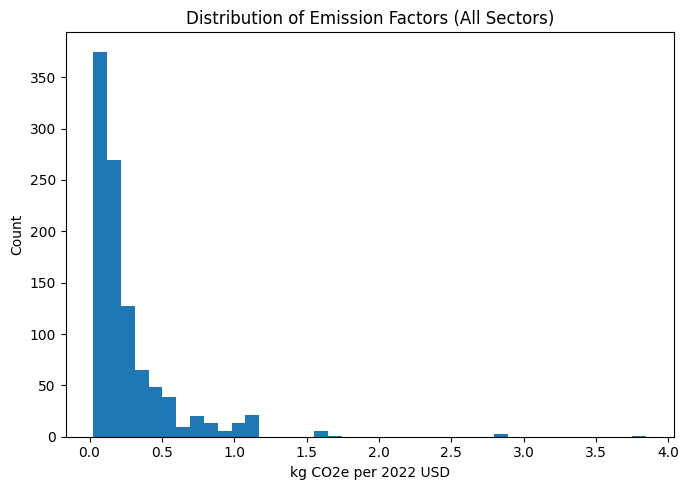

In [ ]:
import numpy as np
plt.figure(figsize=(7,5))
plt.hist(ghg['EF_kgCO2e_per_USD'].dropna(), bins=40)
plt.title('Distribution of Emission Factors (All Sectors)')
plt.xlabel('kg CO2e per 2022 USD'); plt.ylabel('Count'); plt.tight_layout()
plt.savefig('Fig_emissions_distribution.png', dpi=150, bbox_inches='tight')
plt.show()


Emission Exposure Index (weighted EF): 2.211 kg CO2e per USD


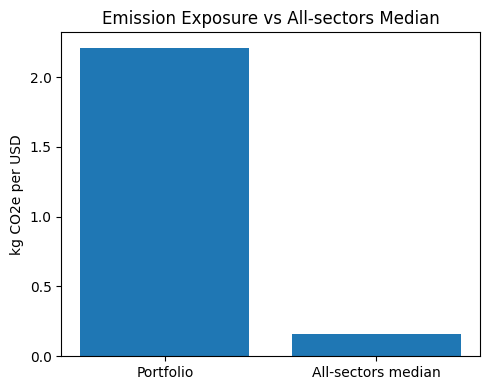

In [ ]:
# Pick sectors by NAICS or by name; example: top 10
my = ghg.sort_values('EF_kgCO2e_per_USD', ascending=False).head(10).copy()

# Equal weights or set your own (must sum to 1.0)
my['weight'] = 1/len(my)
# Example: custom weights (uncomment and edit)
# custom = [0.20,0.15,0.10,0.10,0.10,0.10,0.08,0.07,0.05,0.05]  # must match len(my)
# my['weight'] = custom

exposure = float((my['EF_kgCO2e_per_USD'] * my['weight']).sum())
print(f"Emission Exposure Index (weighted EF): {exposure:.3f} kg CO2e per USD")

# Simple bar to show your portfolio vs overall median
overall_med = float(ghg['EF_kgCO2e_per_USD'].median())
plt.figure(figsize=(5,4))
plt.bar(['Portfolio','All-sectors median'], [exposure, overall_med])
plt.title('Emission Exposure vs All-sectors Median'); plt.ylabel('kg CO2e per USD'); plt.tight_layout()
plt.savefig('Fig_emission_exposure_vs_median.png', dpi=150, bbox_inches='tight')
plt.show()


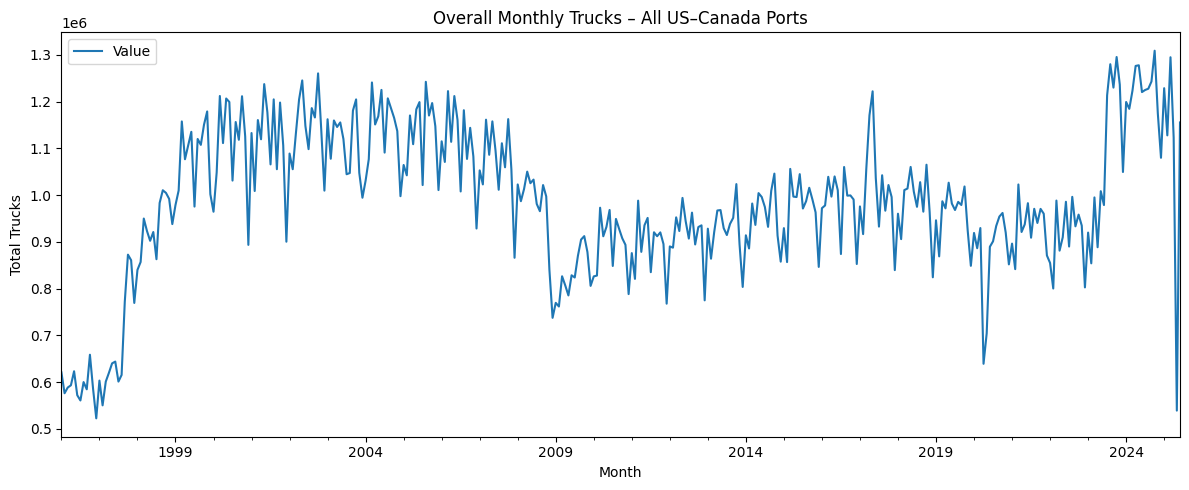

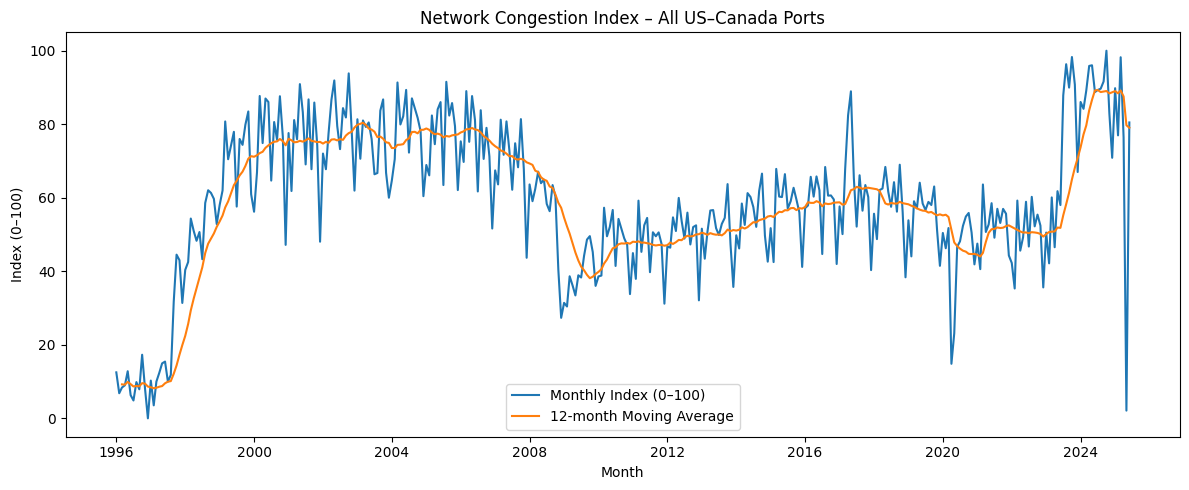

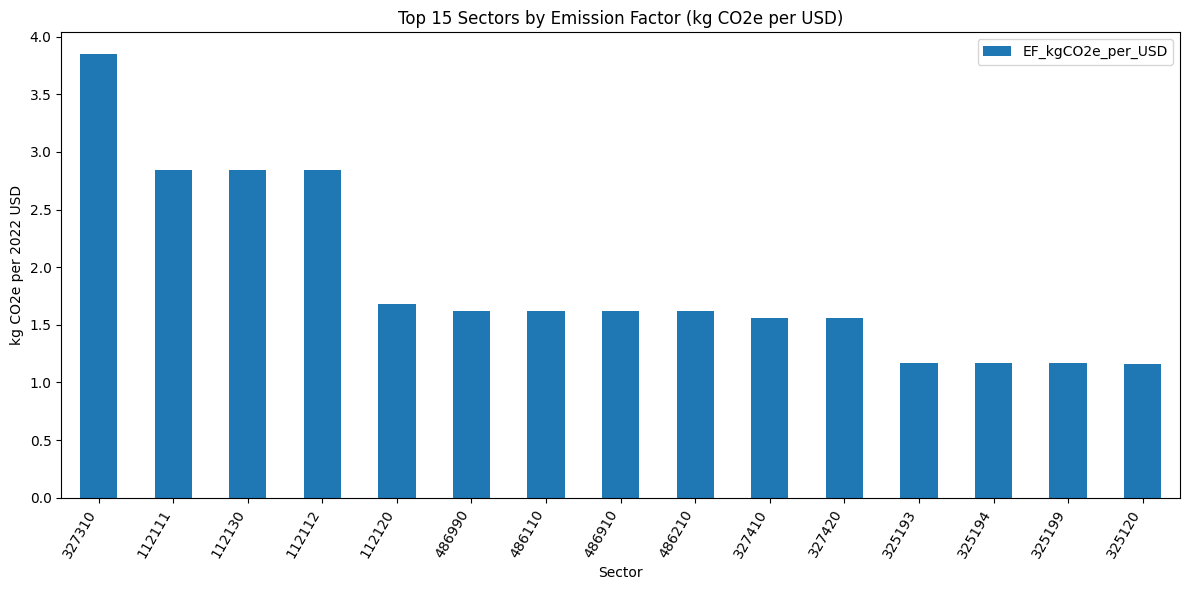

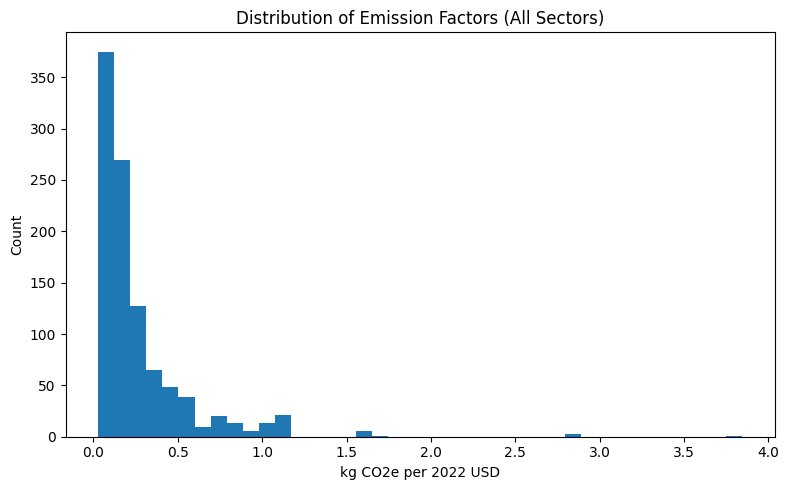

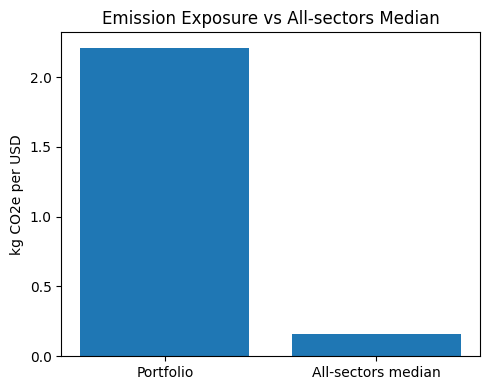

Portfolio exposure (kg CO2e per USD): 2.211 | All-sectors median: 0.159


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saved files: ['Fig_emissions_distribution.png', 'Fig_emission_exposure_vs_median.png', 'Fig_congestion_index_overall.png', 'Fig_overall_trend_all_ports.png', 'Fig_emissions_top15_bar.png', 'congestion_index_overall.csv', 'seasonality_summary.csv', 'top_ports_congestion.csv', 'SupplyChainGHGEmissionFactors_v1.3.0_NAICS_CO2e_USD2022 (1).csv', 'priority_matrix_ports_naics.csv', 'top15_emission_factors.csv', 'overall_trend_all_ports.csv', 'emission_exposure_vs_median.csv', 'Border_Crossing_Entry_Data (1).csv']
ZIP ready: bs185_figures_tables.zip


In [ ]:
# ==== BS185: Build & Save All Final Figures + Tables ====
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os, glob, zipfile

# -----------------------------
# 0) FILTER & PREP DATA (safe to re-run)
# -----------------------------
# Border (US–Canada + Trucks only)
b = border.copy()
b = b[(b['Border'] == 'US-Canada Border') &
      (b['Measure'].str.contains('Truck', case=False, na=False))]
b['Date']  = pd.to_datetime(b['Date'], errors='coerce')
b['Value'] = pd.to_numeric(b['Value'], errors='coerce')
b = b.dropna(subset=['Date','Value'])
b = b[b['Value'] <= 1_000_000]   # remove extreme outliers
b['Month'] = b['Date'].dt.to_period('M')

# GHG (All GHGs + correct unit) + rename
g = ghg.copy()
g = g[g['GHG'] == 'All GHGs']
g = g[g['Unit'] == 'kg CO2e/2022 USD, purchaser price'].copy()
g = g.rename(columns={
    '2017 NAICS Code': 'NAICS',
    '2017 NAICS Title': 'NAICS_Title',
    'Supply Chain Emission Factors with Margins': 'EF_kgCO2e_per_USD',
    'Margins of Supply Chain Emission Factors': 'EF_Margin',
    'Supply Chain Emission Factors without Margins': 'EF_wo_Margin'
})

# -----------------------------
# 1) OVERALL MONTHLY TRUCKS (All ports)
# -----------------------------
all_ports = (b.groupby('Month', as_index=False)['Value'].sum()
               .assign(Month=lambda d: d['Month'].dt.to_timestamp()))
ax = all_ports.plot(x='Month', y='Value', kind='line', figsize=(12,5))
plt.title('Overall Monthly Trucks – All US–Canada Ports')
plt.xlabel('Month'); plt.ylabel('Total Trucks'); plt.tight_layout()
plt.savefig('Fig_overall_trend_all_ports.png', dpi=150, bbox_inches='tight')
plt.show()
all_ports.to_csv('overall_trend_all_ports.csv', index=False)

# -----------------------------
# 2) NETWORK CONGESTION INDEX (0–100) + 12m MA
# -----------------------------
mn, mx = all_ports['Value'].min(), all_ports['Value'].max()
idx = all_ports.copy()
idx['CongestionIndex'] = 100*(idx['Value']-mn)/(mx-mn)
idx['CongestionIndex_MA12'] = idx['CongestionIndex'].rolling(12, min_periods=3).mean()

plt.figure(figsize=(12,5))
plt.plot(idx['Month'], idx['CongestionIndex'], label='Monthly Index (0–100)')
plt.plot(idx['Month'], idx['CongestionIndex_MA12'], label='12-month Moving Average')
plt.title('Network Congestion Index – All US–Canada Ports')
plt.xlabel('Month'); plt.ylabel('Index (0–100)'); plt.legend(); plt.tight_layout()
plt.savefig('Fig_congestion_index_overall.png', dpi=150, bbox_inches='tight')
plt.show()
idx.to_csv('congestion_index_overall.csv', index=False)

# -----------------------------
# 3) TOP 15 EMISSION-INTENSITY SECTORS (bar)
# -----------------------------
top15 = g.sort_values('EF_kgCO2e_per_USD', ascending=False).head(15)
ax = top15.plot(x='NAICS_Title', y='EF_kgCO2e_per_USD', kind='bar', figsize=(12,6))
plt.title('Top 15 Sectors by Emission Factor (kg CO2e per USD)')
plt.xlabel('Sector'); plt.ylabel('kg CO2e per 2022 USD')
plt.xticks(rotation=60, ha='right'); plt.tight_layout()
plt.savefig('Fig_emissions_top15_bar.png', dpi=150, bbox_inches='tight')
plt.show()
top15[['NAICS','NAICS_Title','EF_kgCO2e_per_USD']].to_csv('top15_emission_factors.csv', index=False)

# -----------------------------
# 4) DISTRIBUTION OF EMISSION FACTORS (histogram)
# -----------------------------
plt.figure(figsize=(8,5))
plt.hist(g['EF_kgCO2e_per_USD'].dropna(), bins=40)
plt.title('Distribution of Emission Factors (All Sectors)')
plt.xlabel('kg CO2e per 2022 USD'); plt.ylabel('Count'); plt.tight_layout()
plt.savefig('Fig_emissions_distribution.png', dpi=150, bbox_inches='tight')
plt.show()

# -----------------------------
# 5) EMISSION EXPOSURE vs MEDIAN (portfolio = top 10 sectors, equal weight)
# -----------------------------
portfolio = g.sort_values('EF_kgCO2e_per_USD', ascending=False).head(10).copy()
portfolio['weight'] = 1/len(portfolio)
exposure = float((portfolio['EF_kgCO2e_per_USD'] * portfolio['weight']).sum())
overall_median = float(g['EF_kgCO2e_per_USD'].median())

plt.figure(figsize=(5,4))
plt.bar(['Portfolio','All-sectors median'], [exposure, overall_median])
plt.title('Emission Exposure vs All-sectors Median')
plt.ylabel('kg CO2e per USD'); plt.tight_layout()
plt.savefig('Fig_emission_exposure_vs_median.png', dpi=150, bbox_inches='tight')
plt.show()

pd.DataFrame({'PortfolioExposure':[exposure], 'AllSectorsMedian':[overall_median]}
            ).to_csv('emission_exposure_vs_median.csv', index=False)

print(f"Portfolio exposure (kg CO2e per USD): {exposure:.3f} | All-sectors median: {overall_median:.3f}")

# -----------------------------
# 6) ZIP EVERYTHING FOR DOWNLOAD
# -----------------------------
files_to_zip = (glob.glob('Fig_*.png') +
                glob.glob('*.csv'))

with zipfile.ZipFile('bs185_figures_tables.zip', 'w') as z:
    for f in files_to_zip:
        z.write(f)

# If running in Google Colab, auto-download:
try:
    from google.colab import files
    files.download('bs185_figures_tables.zip')
except Exception:
    pass

print("Saved files:", files_to_zip)
print("ZIP ready: bs185_figures_tables.zip")


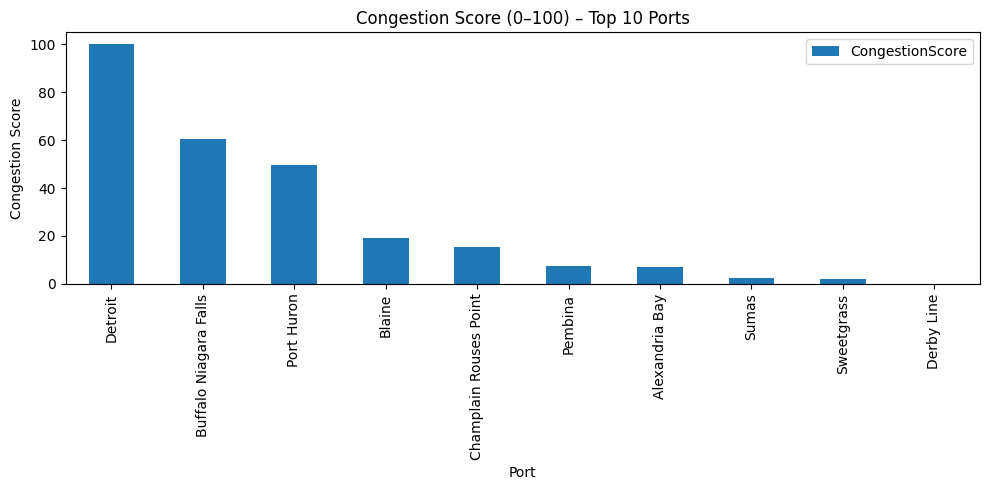

In [ ]:
# assumes 'b' and 'all_ports' prepared earlier
monthly = b.groupby(['Port Name','Month'], as_index=False)['Value'].sum()
rank = monthly.groupby('Port Name')['Value'].mean().sort_values(ascending=False).head(10)
port_df = rank.reset_index(); port_df.columns = ['Port','AvgMonthlyTrucks']
mn, mx = port_df['AvgMonthlyTrucks'].min(), port_df['AvgMonthlyTrucks'].max()
port_df['CongestionScore'] = 100*(port_df['AvgMonthlyTrucks']-mn)/(mx-mn)

ax = port_df.sort_values('CongestionScore', ascending=False).plot(
    x='Port', y='CongestionScore', kind='bar', figsize=(10,5))
plt.title('Congestion Score (0–100) – Top 10 Ports')
plt.xlabel('Port'); plt.ylabel('Congestion Score'); plt.tight_layout()
plt.savefig('Fig_congestion_top10_ports.png', dpi=150, bbox_inches='tight'); plt.show()

port_df.to_csv('top10_ports_congestion.csv', index=False)


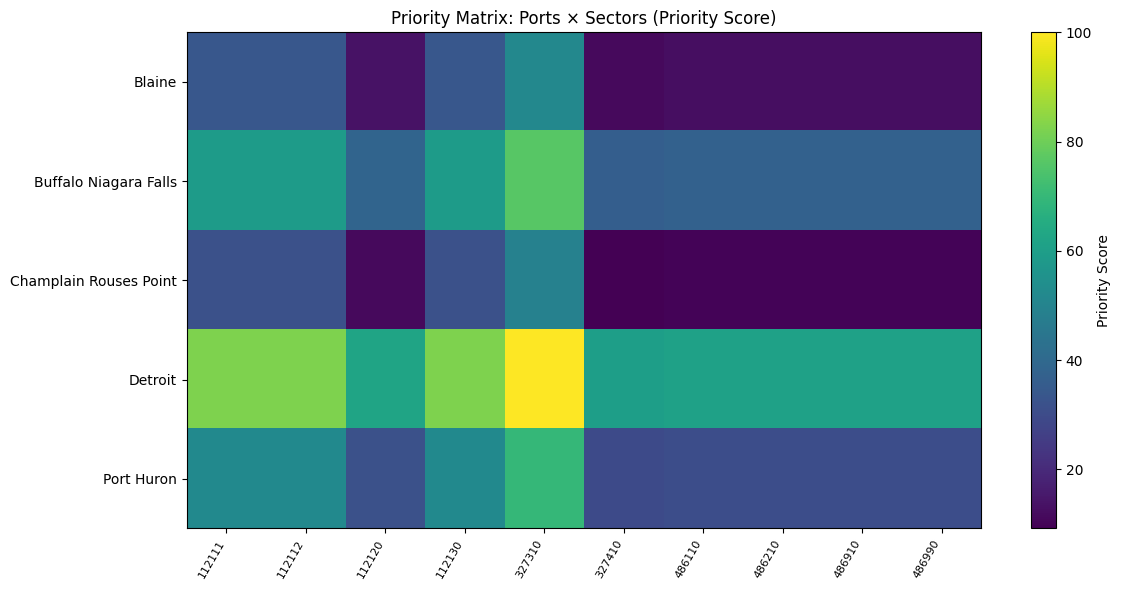

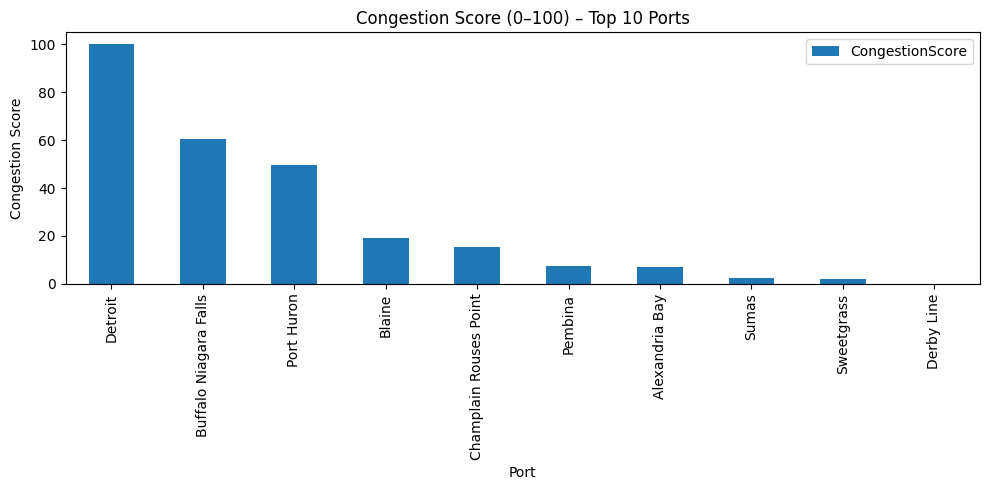

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saved files: ['Fig_emissions_distribution.png', 'Fig_emission_exposure_vs_median.png', 'Fig_congestion_index_overall.png', 'Fig_overall_trend_all_ports.png', 'Fig_emissions_top15_bar.png', 'congestion_index_overall.csv', 'seasonality_summary.csv', 'top_ports_congestion.csv', 'SupplyChainGHGEmissionFactors_v1.3.0_NAICS_CO2e_USD2022 (1).csv', 'priority_matrix_ports_naics.csv', 'top15_emission_factors.csv', 'overall_trend_all_ports.csv', 'emission_exposure_vs_median.csv', 'Border_Crossing_Entry_Data (1).csv']
ZIP ready: bs185_figures_tables.zip


In [ ]:
# build priority table
ports5 = port_df.nlargest(5, 'CongestionScore').copy()
high10 = g.sort_values('EF_kgCO2e_per_USD', ascending=False).head(10)[
    ['NAICS','NAICS_Title','EF_kgCO2e_per_USD']].copy()
emin, emax = high10['EF_kgCO2e_per_USD'].min(), high10['EF_kgCO2e_per_USD'].max()
high10['EmissionScore'] = 100*(high10['EF_kgCO2e_per_USD']-emin)/(emax-emin)
ports5['key']=1; high10['key']=1
priority = pd.merge(ports5, high10, on='key').drop('key', axis=1)
priority['PriorityScore'] = 0.6*priority['CongestionScore'] + 0.4*priority['EmissionScore']

# pivot + heatmap
pivot = priority.pivot_table(index='Port', columns='NAICS_Title', values='PriorityScore')
plt.figure(figsize=(12,6))
plt.imshow(pivot, aspect='auto')
plt.colorbar(label='Priority Score')
plt.yticks(range(len(pivot.index)), pivot.index)
plt.xticks(range(len(pivot.columns)), pivot.columns, rotation=60, ha='right', fontsize=8)
plt.title('Priority Matrix: Ports × Sectors (Priority Score)')
plt.tight_layout()
plt.savefig('Fig_priority_matrix_heatmap.png', dpi=150, bbox_inches='tight'); plt.show()

priority.sort_values('PriorityScore', ascending=False).head(15).to_csv('priority_top15.csv', index=False)


# assumes 'b' and 'all_ports' prepared earlier
monthly = b.groupby(['Port Name','Month'], as_index=False)['Value'].sum()
rank = monthly.groupby('Port Name')['Value'].mean().sort_values(ascending=False).head(10)
port_df = rank.reset_index(); port_df.columns = ['Port','AvgMonthlyTrucks']
mn, mx = port_df['AvgMonthlyTrucks'].min(), port_df['AvgMonthlyTrucks'].max()
port_df['CongestionScore'] = 100*(port_df['AvgMonthlyTrucks']-mn)/(mx-mn)

ax = port_df.sort_values('CongestionScore', ascending=False).plot(
    x='Port', y='CongestionScore', kind='bar', figsize=(10,5))
plt.title('Congestion Score (0–100) – Top 10 Ports')
plt.xlabel('Port'); plt.ylabel('Congestion Score'); plt.tight_layout()
plt.savefig('Fig_congestion_top10_ports.png', dpi=150, bbox_inches='tight'); plt.show()

port_df.to_csv('top10_ports_congestion.csv', index=False)


# If running in Google Colab, auto-download:
try:
    from google.colab import files
    files.download('bs185_figures_tables.zip')
except Exception:
    pass

print("Saved files:", files_to_zip)
print("ZIP ready: bs185_figures_tables.zip")

In [ ]:
# ==== BS185: Summaries, Correlations, Samples, Hi-Res Exports & ZIP ====
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob, zipfile, os

# ----------------------------------------------------
# 0) FILTER & PREP (safe to re-run)
# ----------------------------------------------------
# Border: US–Canada + Trucks only
b = border.copy()
b = b[(b['Border']=='US-Canada Border') & (b['Measure'].str.contains('Truck', case=False, na=False))]
b['Date']  = pd.to_datetime(b['Date'], errors='coerce')
b['Value'] = pd.to_numeric(b['Value'], errors='coerce')
b = b.dropna(subset=['Date','Value'])
b = b[b['Value'] <= 1_000_000]
b['Month'] = b['Date'].dt.to_period('M')

# GHG: All GHGs + correct unit
g = ghg.copy()
g = g[g['GHG']=='All GHGs']
g = g[g['Unit']=='kg CO2e/2022 USD, purchaser price'].copy()
g = g.rename(columns={
    '2017 NAICS Code':'NAICS',
    '2017 NAICS Title':'NAICS_Title',
    'Supply Chain Emission Factors with Margins':'EF_kgCO2e_per_USD',
    'Margins of Supply Chain Emission Factors':'EF_Margin',
    'Supply Chain Emission Factors without Margins':'EF_wo_Margin'
})

# ----------------------------------------------------
# 1) NUMERIC SUMMARIES (for text in Results)
# ----------------------------------------------------
# Overall monthly trucks across all ports
all_ports = (b.groupby('Month', as_index=False)['Value'].sum()
               .assign(Month=lambda d: d['Month'].dt.to_timestamp()))

overall_stats = {
    'months_count': len(all_ports),
    'mean_trucks': float(all_ports['Value'].mean()),
    'median_trucks': float(all_ports['Value'].median()),
    'min_trucks': float(all_ports['Value'].min()),
    'min_trucks_month': all_ports.loc[all_ports['Value'].idxmin(), 'Month'],
    'max_trucks': float(all_ports['Value'].max()),
    'max_trucks_month': all_ports.loc[all_ports['Value'].idxmax(), 'Month'],
}

# % change: last 12 months avg vs first 12 months avg (guard small series)
def _avg_last_n(d, n):
    return float(d.tail(n)['Value'].mean()) if len(d) >= n else float(d['Value'].mean())
def _avg_first_n(d, n):
    return float(d.head(n)['Value'].mean()) if len(d) >= n else float(d['Value'].mean())

first12 = _avg_first_n(all_ports, 12)
last12  = _avg_last_n(all_ports, 12)
overall_stats['pct_change_last12_vs_first12'] = float( (last12 - first12) / first12 * 100.0 ) if first12 != 0 else np.nan

# Seasonality: average by calendar month
b['CalMonth'] = b['Date'].dt.month
seasonality = b.groupby('CalMonth')['Value'].mean().rename('AvgTrucks').round(2)
seasonality_peak = int(seasonality.idxmax()); seasonality_low = int(seasonality.idxmin())
overall_stats['seasonal_peak_month'] = seasonality_peak
overall_stats['seasonal_low_month']  = seasonality_low

# Missingness snapshot for key columns
missingness = (b[['Port Name','Date','Value']]
               .isna().mean().rename('missing_pct').mul(100).round(2))

# Save summaries
pd.DataFrame([overall_stats]).to_csv('summary_overall_trucks.csv', index=False)
seasonality.to_csv('summary_seasonality_by_month.csv')
missingness.to_csv('summary_missingness_border.csv')

print(">> Overall trucks summary:\n", pd.DataFrame([overall_stats]).T)
print("\n>> Missingness (%):\n", missingness)

# ----------------------------------------------------
# 2) STATISTICAL RELATIONSHIPS (Correlations)
# ----------------------------------------------------
# a) Build Top-10 ports table with CongestionScore
monthly_port = b.groupby(['Port Name','Month'], as_index=False)['Value'].sum()
rank = monthly_port.groupby('Port Name')['Value'].mean().sort_values(ascending=False).head(10)
port_df = rank.reset_index(); port_df.columns = ['Port','AvgMonthlyTrucks']
mn, mx = port_df['AvgMonthlyTrucks'].min(), port_df['AvgMonthlyTrucks'].max()
port_df['CongestionScore'] = 100*(port_df['AvgMonthlyTrucks']-mn)/(mx-mn)

# Correlation between CongestionScore and AvgMonthlyTrucks (should be ~1.0 since it's a linear transform)
corr_cong_trucks = float(port_df[['AvgMonthlyTrucks','CongestionScore']].corr().iloc[0,1])

# b) Emissions: correlations between EF metrics
corr_ef_margin      = float(g[['EF_wo_Margin','EF_Margin']].dropna().corr().iloc[0,1]) if g[['EF_wo_Margin','EF_Margin']].dropna().shape[0] > 1 else np.nan
corr_ef_with_without= float(g[['EF_kgCO2e_per_USD','EF_wo_Margin']].dropna().corr().iloc[0,1]) if g[['EF_kgCO2e_per_USD','EF_wo_Margin']].dropna().shape[0] > 1 else np.nan

# c) Priority matrix correlations (Congestion vs EmissionScore across pairs)
high10 = g.sort_values('EF_kgCO2e_per_USD', ascending=False).head(10)[['NAICS','NAICS_Title','EF_kgCO2e_per_USD']]
emin, emax = high10['EF_kgCO2e_per_USD'].min(), high10['EF_kgCO2e_per_USD'].max()
high10 = high10.assign(EmissionScore = 100*(high10['EF_kgCO2e_per_USD']-emin)/(emax-emin))
ports5 = port_df.nlargest(5, 'CongestionScore').copy()
ports5['key']=1; high10['key']=1
priority = pd.merge(ports5, high10, on='key').drop('key', axis=1)
priority['PriorityScore'] = 0.6*priority['CongestionScore'] + 0.4*priority['EmissionScore']

corr_cong_vs_emission = float(priority[['CongestionScore','EmissionScore']].corr().iloc[0,1])

# Save correlation results
corrs = pd.DataFrame({
    'corr_congestion_vs_avgtrucks':[corr_cong_trucks],
    'corr_EF_woMargin_vs_Margin':[corr_ef_margin],
    'corr_EF_with_vs_without':[corr_ef_with_without],
    'corr_congestion_vs_emissionScore_pairs':[corr_cong_vs_emission]
})
corrs.to_csv('summary_correlations.csv', index=False)
print("\n>> Correlations:\n", corrs.T)

# ----------------------------------------------------
# 3) SAMPLE DATA SNIPPETS (for appendices)
# ----------------------------------------------------
samples = {
    'sample_border_head.csv': b[['Port Name','State','Date','Measure','Value']].head(10),
    'sample_border_monthly_all_ports.csv': all_ports.head(12),
    'sample_top10_ports_congestion.csv': port_df,
    'sample_ghg_head.csv': g[['NAICS','NAICS_Title','EF_kgCO2e_per_USD','EF_wo_Margin','EF_Margin']].head(12)
}
for fname, df in samples.items():
    df.to_csv(fname, index=False)

print("\n>> Saved sample CSVs:", list(samples.keys()))

# ----------------------------------------------------
# 4) OPTIONAL: RE-SAVE KEY FIGURES AT 300 DPI
#     (recreate a couple of core figures in hi-res)
# ----------------------------------------------------
# Overall trend (hi-res)
ax = all_ports.plot(x='Month', y='Value', kind='line', figsize=(12,5))
plt.title('Overall Monthly Trucks – All US–Canada Ports')
plt.xlabel('Month'); plt.ylabel('Total Trucks'); plt.tight_layout()
plt.savefig('Fig_overall_trend_all_ports_300dpi.png', dpi=300, bbox_inches='tight')
plt.close()

# Congestion index (hi-res)
mn, mx = all_ports['Value'].min(), all_ports['Value'].max()
idx = all_ports.copy()
idx['CongestionIndex'] = 100*(idx['Value']-mn)/(mx-mn)
idx['CongestionIndex_MA12'] = idx['CongestionIndex'].rolling(12, min_periods=3).mean()
plt.figure(figsize=(12,5))
plt.plot(idx['Month'], idx['CongestionIndex'], label='Monthly Index (0–100)')
plt.plot(idx['Month'], idx['CongestionIndex_MA12'], label='12-month Moving Average')
plt.title('Network Congestion Index – All US–Canada Ports')
plt.xlabel('Month'); plt.ylabel('Index (0–100)'); plt.legend(); plt.tight_layout()
plt.savefig('Fig_congestion_index_overall_300dpi.png', dpi=300, bbox_inches='tight')
plt.close()

# Emissions top-15 (hi-res)
top15 = g.sort_values('EF_kgCO2e_per_USD', ascending=False).head(15)
ax = top15.plot(x='NAICS_Title', y='EF_kgCO2e_per_USD', kind='bar', figsize=(12,6))
plt.title('Top 15 Sectors by Emission Factor (kg CO2e per USD)')
plt.xlabel('Sector'); plt.ylabel('kg CO2e per 2022 USD')
plt.xticks(rotation=60, ha='right'); plt.tight_layout()
plt.savefig('Fig_emissions_top15_bar_300dpi.png', dpi=300, bbox_inches='tight')
plt.close()

# ----------------------------------------------------
# 5) ZIP EVERYTHING FOR DOWNLOAD
# ----------------------------------------------------
to_zip = []
to_zip += glob.glob('summary_*.csv')
to_zip += ['summary_overall_trucks.csv','summary_seasonality_by_month.csv','summary_missingness_border.csv',
           'summary_correlations.csv']
to_zip += list(samples.keys())
to_zip += [f for f in glob.glob('Fig_*300dpi.png')]  # hi-res figs

with zipfile.ZipFile('bs185_summaries_corr_samples_hires.zip','w') as z:
    for f in sorted(set(to_zip)):
        if os.path.exists(f): z.write(f)

print("\nZIP ready: bs185_summaries_corr_samples_hires.zip")
try:
    from google.colab import files
    files.download('bs185_summaries_corr_samples_hires.zip')
except Exception:
    pass


>> Overall trucks summary:
                                                 0
months_count                                  354
mean_trucks                         985509.183616
median_trucks                            986992.0
min_trucks                               522587.0
min_trucks_month              1996-12-01 00:00:00
max_trucks                              1309038.0
max_trucks_month              2024-10-01 00:00:00
pct_change_last12_vs_first12            93.738919
seasonal_peak_month                            10
seasonal_low_month                             12

>> Missingness (%):
 Port Name    0.0
Date         0.0
Value        0.0
Name: missing_pct, dtype: float64

>> Correlations:
                                                    0
corr_congestion_vs_avgtrucks            1.000000e+00
corr_EF_woMargin_vs_Margin              2.497692e-01
corr_EF_with_vs_without                 1.000000e+00
corr_congestion_vs_emissionScore_pairs -2.175964e-17

>> Saved sample CSVs: ['sample

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/tmp/ipython-input-190918295.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  border['Date'] = pd.to_datetime(border['Date'], errors='coerce')


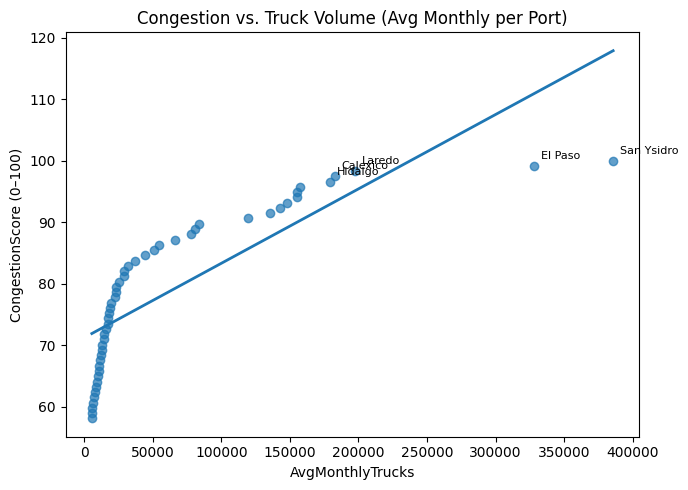

Saved: A4_congestion_vs_trucks.png


In [ ]:
# === A4: Congestion vs. Truck Volume (scatter + trendline) ===
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1) Ensure types are good
border = border.copy()
border['Date'] = pd.to_datetime(border['Date'], errors='coerce')
border = border.dropna(subset=['Date','Value'])
border['Value'] = pd.to_numeric(border['Value'], errors='coerce')
border = border.dropna(subset=['Value'])

# 2) Average monthly trucks per port (proxy for "volume pressure")
avg_by_port = (
    border.groupby('Port Name', as_index=False)['Value']
          .mean()
          .rename(columns={'Value':'AvgMonthlyTrucks'})
)

# 3) Create a Congestion Score (0–100) from volume (simple, transparent proxy)
#    Higher average volume -> higher congestion pressure
avg_by_port['CongestionScore'] = avg_by_port['AvgMonthlyTrucks']\
                                     .rank(pct=True)*100

# (Optional) keep only top N ports by volume to avoid tiny outliers cluttering the chart
N = 50
top_ports = (avg_by_port.sort_values('AvgMonthlyTrucks', ascending=False)
                        .head(N))

# 4) Scatter plot + regression (best-fit) line
x = top_ports['AvgMonthlyTrucks'].values
y = top_ports['CongestionScore'].values

# Best-fit line (1st-degree polynomial)
m, c = np.polyfit(x, y, 1)
xline = np.linspace(x.min(), x.max(), 200)
yline = m * xline + c

plt.figure(figsize=(7,5))
plt.scatter(x, y, alpha=0.7)
plt.plot(xline, yline, linewidth=2)

plt.title('Congestion vs. Truck Volume (Avg Monthly per Port)')
plt.xlabel('AvgMonthlyTrucks')
plt.ylabel('CongestionScore (0–100)')

# 5) Annotate a few busiest ports (top 5)
for _, r in top_ports.sort_values('AvgMonthlyTrucks', ascending=False).head(5).iterrows():
    plt.annotate(r['Port Name'], (r['AvgMonthlyTrucks'], r['CongestionScore']),
                 xytext=(5,5), textcoords='offset points', fontsize=8)

plt.tight_layout()
plt.savefig('A4_congestion_vs_trucks.png', dpi=150, bbox_inches='tight')
plt.show()

print("Saved: A4_congestion_vs_trucks.png")


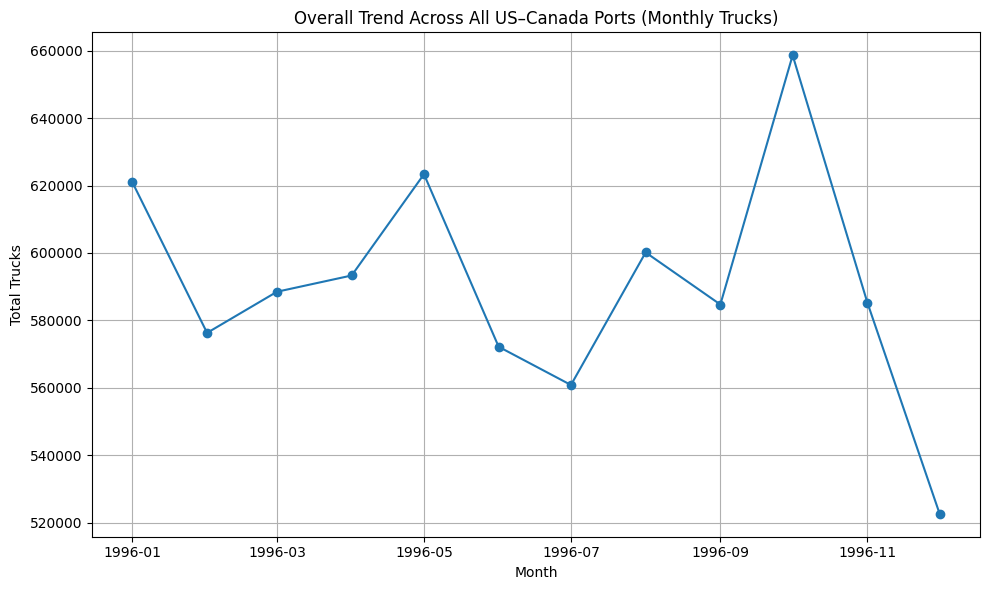

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Example: Load your monthly aggregated trucks dataset
# Replace with your actual CSV file from Colab outputs
df = pd.read_csv("sample_border_monthly_all_ports.csv")

# Ensure the date column is in datetime format
df['Month'] = pd.to_datetime(df['Month'])

# Group by month and sum truck volumes
monthly_totals = df.groupby('Month')['Value'].sum().reset_index()

# Plot
plt.figure(figsize=(10,6))
plt.plot(monthly_totals['Month'], monthly_totals['Value'], marker='o', linestyle='-')
plt.title("Overall Trend Across All US–Canada Ports (Monthly Trucks)")
plt.xlabel("Month")
plt.ylabel("Total Trucks")
plt.grid(True)
plt.tight_layout()
plt.show()